In [1]:
import scipy, pandas, numpy
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
import seaborn as sns

df = pandas.read_csv('sme_finance_monitor_q2_2018-q3_2020v2.csv')
print(df.columns)

Index(['uniq_id', 'serial', 'weight', 'pcode', 'dwave', 'banused', 'disgeg',
       'futfin_1', 'futfin_2', 'futfin_3',
       ...
       'q144', 'q144b', 'q145', 'q150', 'q152152_1', 'q151152_2', 'q151152_3',
       'q151152_4', 'q151152_5', 'q153'],
      dtype='object', length=2246)


In [2]:
df_new = df
df_new['outcome'] = -1

df_new.loc[((df_new['q57_1']>0)&(df_new['q57_1']<5))|((df_new['q57_2']>0)&(df_new['q57_2']<5))|
            ((df_new['q57_3']>0)&(df_new['q57_3']<5))|((df_new['q57_4']>0)&(df_new['q57_4']<5))|
            ((df_new['q57_7']>0)&(df_new['q57_7']<5))|((df_new['q57_8']>0)&(df_new['q57_8']<5))|
            ((df_new['q57_9']>0)&(df_new['q57_9']<5))|((df_new['q57_10']>0)&(df_new['q57_10']<5))|
            ((df_new['q57_11']>0)&(df_new['q57_11']<5))|((df_new['q57_12']>0)&(df_new['q57_12']<5))|
            ((df_new['q57_13']>0)&(df_new['q57_13']<5))|((df_new['q57_14']>0)&(df_new['q57_14']<5))|
            ((df_new['q57_15']>0)&(df_new['q57_15']<5))|((df_new['q57_16']>0)&(df_new['q57_16']<5))|
            ((df_new['q39_1_1']>0)&(df_new['q39_1_1']<5))|((df_new['q39_2_1']>0)&(df_new['q39_2_1']<5))|
            ((df_new['q39_3_1']>0)&(df_new['q39_3_1']<5))|((df_new['q39_4_1']>0)&(df_new['q39_4_1']<5))|
            ((df_new['q39_1_2']>0)&(df_new['q39_1_2']<5))|((df_new['q39_2_2']>0)&(df_new['q39_2_2']<5))|
            ((df_new['q39_3_2']>0)&(df_new['q39_3_2']<5))|((df_new['q39_4_2']>0)&(df_new['q39_4_2']<5))|
            ((df_new['q39_1_3']>0)&(df_new['q39_1_3']<5))|((df_new['q39_2_3']>0)&(df_new['q39_2_3']<5))|
            ((df_new['q39_3_3']>0)&(df_new['q39_3_3']<5))|((df_new['q39_4_3']>0)&(df_new['q39_4_3']<5))|
            ((df_new['q39_1_4']>0)&(df_new['q39_1_4']<5))|((df_new['q39_2_4']>0)&(df_new['q39_2_4']<5))|
            ((df_new['q39_3_4']>0)&(df_new['q39_3_4']<5))|((df_new['q39_4_4']>0)&(df_new['q39_4_4']<5))|
            ((df_new['q39_1_7']>0)&(df_new['q39_1_7']<5))|((df_new['q39_2_7']>0)&(df_new['q39_2_7']<5))|
            ((df_new['q39_3_7']>0)&(df_new['q39_3_7']<5))|((df_new['q39_4_7']>0)&(df_new['q39_4_7']<5))|
            ((df_new['q39_1_8']>0)&(df_new['q39_1_8']<5))|((df_new['q39_2_8']>0)&(df_new['q39_2_8']<5))|
            ((df_new['q39_3_8']>0)&(df_new['q39_3_8']<5))|((df_new['q39_4_8']>0)&(df_new['q39_4_8']<5))|
            ((df_new['q39_1_9']>0)&(df_new['q39_1_9']<5))|((df_new['q39_2_9']>0)&(df_new['q39_2_9']<5))|
            ((df_new['q39_3_9']>0)&(df_new['q39_3_9']<5))|((df_new['q39_4_9']>0)&(df_new['q39_4_9']<5))|
            ((df_new['q39_1_10']>0)&(df_new['q39_1_10']<5))|((df_new['q39_2_10']>0)&(df_new['q39_2_10']<5))|
            ((df_new['q39_3_10']>0)&(df_new['q39_3_10']<5))|((df_new['q39_4_10']>0)&(df_new['q39_4_10']<5))|
            ((df_new['q39_1_11']>0)&(df_new['q39_1_11']<5))|((df_new['q39_2_11']>0)&(df_new['q39_2_11']<5))|
            ((df_new['q39_3_11']>0)&(df_new['q39_3_11']<5))|((df_new['q39_4_11']>0)&(df_new['q39_4_11']<5))|
            ((df_new['q39_1_12']>0)&(df_new['q39_1_12']<5))|((df_new['q39_2_12']>0)&(df_new['q39_2_12']<5))|
            ((df_new['q39_3_12']>0)&(df_new['q39_3_12']<5))|((df_new['q39_4_12']>0)&(df_new['q39_4_12']<5))|
            ((df_new['q39_1_13']>0)&(df_new['q39_1_13']<5))|((df_new['q39_2_13']>0)&(df_new['q39_2_13']<5))|
            ((df_new['q39_3_13']>0)&(df_new['q39_3_13']<5))|((df_new['q39_4_13']>0)&(df_new['q39_4_13']<5))|
            ((df_new['q39_1_14']>0)&(df_new['q39_1_14']<5))|((df_new['q39_2_14']>0)&(df_new['q39_2_14']<5))|
            ((df_new['q39_3_14']>0)&(df_new['q39_3_14']<5))|((df_new['q39_4_14']>0)&(df_new['q39_4_14']<5))|
            ((df_new['q39_1_15']>0)&(df_new['q39_1_15']<5))|((df_new['q39_2_15']>0)&(df_new['q39_2_15']<5))|
            ((df_new['q39_3_15']>0)&(df_new['q39_3_15']<5))|((df_new['q39_4_15']>0)&(df_new['q39_4_15']<5))|
            ((df_new['q39_1_16']>0)&(df_new['q39_1_16']<5))|((df_new['q39_2_16']>0)&(df_new['q39_2_16']<5))|
            ((df_new['q39_3_16']>0)&(df_new['q39_3_16']<5))|((df_new['q39_4_16']>0)&(df_new['q39_4_16']<5))|
            ((df_new['q39_1_18']>0)&(df_new['q39_1_18']<5))|((df_new['q39_2_18']>0)&(df_new['q39_2_18']<5))|
            ((df_new['q39_3_18']>0)&(df_new['q39_3_18']<5))|((df_new['q39_4_18']>0)&(df_new['q39_4_18']<5))
            ,'outcome'] = 1
# df_new.loc[(df_new['q57_1']<0)&(df_new['q57_2']<0)&(df_new['q57_3']<0)&
#         (df_new['q57_4']<0)&(df_new['q57_7']<0)&(df_new['q57_8']<0)&
#         (df_new['q57_9']<0)&(df_new['q57_10']<0)&
#         (df_new['q57_11']<0)&(df_new['q57_12']<0)&(df_new['q57_13']<0)&
#         (df_new['q57_14']<0)&(df_new['q57_15']<0)&(df_new['q57_16']<0)&
#         (df_new['q39_1_1']<0)&(df_new['q39_2_1']<0)&(df_new['q39_3_1']<0)&(df_new['q39_4_1']<0)&
#         (df_new['q39_1_2']<0)&(df_new['q39_2_2']<0)&(df_new['q39_3_2']<0)&(df_new['q39_4_2']<0)&
#         (df_new['q39_1_3']<0)&(df_new['q39_2_3']<0)&(df_new['q39_3_3']<0)&(df_new['q39_4_3']<0)&
#         (df_new['q39_1_4']<0)&(df_new['q39_2_4']<0)&(df_new['q39_3_4']<0)&(df_new['q39_4_4']<0)&
#         (df_new['q39_1_7']<0)&(df_new['q39_2_7']<0)&(df_new['q39_3_7']<0)&(df_new['q39_4_7']<0)&
#         (df_new['q39_1_8']<0)&(df_new['q39_2_8']<0)&(df_new['q39_3_8']<0)&(df_new['q39_4_8']<0)&
#         (df_new['q39_1_9']<0)&(df_new['q39_2_9']<0)&(df_new['q39_3_9']<0)&(df_new['q39_4_9']<0)&
#         (df_new['q39_1_10']<0)&(df_new['q39_2_10']<0)&(df_new['q39_3_10']<0)&(df_new['q39_4_10']<0)&
#         (df_new['q39_1_11']<0)&(df_new['q39_2_11']<0)&(df_new['q39_3_11']<0)&(df_new['q39_4_11']<0)&
#         (df_new['q39_1_12']<0)&(df_new['q39_2_12']<0)&(df_new['q39_3_12']<0)&(df_new['q39_4_12']<0)&
#         (df_new['q39_1_13']<0)&(df_new['q39_2_13']<0)&(df_new['q39_3_13']<0)&(df_new['q39_4_13']<0)&
#         (df_new['q39_1_14']<0)&(df_new['q39_2_14']<0)&(df_new['q39_3_14']<0)&(df_new['q39_4_14']<0)&
#         (df_new['q39_1_15']<0)&(df_new['q39_2_15']<0)&(df_new['q39_3_15']<0)&(df_new['q39_4_15']<0)&
#         (df_new['q39_1_16']<0)&(df_new['q39_2_16']<0)&(df_new['q39_3_16']<0)&(df_new['q39_4_16']<0)&
#         (df_new['q39_1_18']<0)&(df_new['q39_2_18']<0)&(df_new['q39_3_18']<0)&df_new['q39_4_18']<0
#         ,'outcome'] = -1
df_new.loc[(df_new['q57_1']==5)|(df_new['q57_2']==5)|(df_new['q57_3']==5)|
            (df_new['q57_4']==5)|(df_new['q57_7']==5)|(df_new['q57_8']==5)|
            (df_new['q57_9']==5)|(df_new['q57_10']==5)|(df_new['q57_11']==5)|
            (df_new['q57_12']==5)|(df_new['q57_13']==5)|(df_new['q57_14']==5)|
            (df_new['q57_15']==5)|(df_new['q57_16']==5)|
            (df_new['q39_1_1']==5)|(df_new['q39_2_1']==5)|(df_new['q39_3_1']==5)|(df_new['q39_4_1']==5)|
            (df_new['q39_1_2']==5)|(df_new['q39_2_2']==5)|(df_new['q39_3_2']==5)|(df_new['q39_4_2']==5)|
            (df_new['q39_1_3']==5)|(df_new['q39_2_3']==5)|(df_new['q39_3_3']==5)|(df_new['q39_4_3']==5)|
            (df_new['q39_1_4']==5)|(df_new['q39_2_4']==5)|(df_new['q39_3_4']==5)|(df_new['q39_4_4']==5)|
            (df_new['q39_1_7']==5)|(df_new['q39_2_7']==5)|(df_new['q39_3_7']==5)|(df_new['q39_4_7']==5)|
            (df_new['q39_1_8']==5)|(df_new['q39_2_8']==5)|(df_new['q39_3_8']==5)|(df_new['q39_4_8']==5)|
            (df_new['q39_1_9']==5)|(df_new['q39_2_9']==5)|(df_new['q39_3_9']==5)|(df_new['q39_4_9']==5)|
            (df_new['q39_1_10']==5)|(df_new['q39_2_10']==5)|(df_new['q39_3_10']==5)|(df_new['q39_4_10']==5)|
            (df_new['q39_1_11']==5)|(df_new['q39_2_11']==5)|(df_new['q39_3_11']==5)|(df_new['q39_4_11']==5)|
            (df_new['q39_1_12']==5)|(df_new['q39_2_12']==5)|(df_new['q39_3_12']==5)|(df_new['q39_4_12']==5)|
            (df_new['q39_1_13']==5)|(df_new['q39_2_13']==5)|(df_new['q39_3_13']==5)|(df_new['q39_4_13']==5)|
            (df_new['q39_1_14']==5)|(df_new['q39_2_14']==5)|(df_new['q39_3_14']==5)|(df_new['q39_4_14']==5)|
            (df_new['q39_1_15']==5)|(df_new['q39_2_15']==5)|(df_new['q39_3_15']==5)|(df_new['q39_4_15']==5)|
            (df_new['q39_1_16']==5)|(df_new['q39_2_16']==5)|(df_new['q39_3_16']==5)|(df_new['q39_4_16']==5)|
            (df_new['q39_1_18']==5)|(df_new['q39_2_18']==5)|(df_new['q39_3_18']==5)|(df_new['q39_4_18']==5)
,'outcome'] = 0
df_new.loc[(df_new['q57_1']==6)|(df_new['q57_2']==6)|(df_new['q57_3']==5)|
            (df_new['q57_4']==6)|(df_new['q57_7']==6)|(df_new['q57_8']==5)|
            (df_new['q57_9']==6)|(df_new['q57_10']==6)|(df_new['q57_11']==5)|
            (df_new['q57_12']==6)|(df_new['q57_13']==6)|(df_new['q57_14']==5)|
            (df_new['q57_15']==6)|(df_new['q57_16']==6)|
            (df_new['q39_1_1']==6)|(df_new['q39_2_1']==6)|(df_new['q39_3_1']==6)|(df_new['q39_4_1']==6)|
            (df_new['q39_1_2']==6)|(df_new['q39_2_2']==6)|(df_new['q39_3_2']==6)|(df_new['q39_4_2']==6)|
            (df_new['q39_1_3']==6)|(df_new['q39_2_3']==6)|(df_new['q39_3_3']==6)|(df_new['q39_4_3']==6)|
            (df_new['q39_1_4']==6)|(df_new['q39_2_4']==6)|(df_new['q39_3_4']==6)|(df_new['q39_4_4']==6)|
            (df_new['q39_1_7']==6)|(df_new['q39_2_7']==6)|(df_new['q39_3_7']==6)|(df_new['q39_4_7']==6)|
            (df_new['q39_1_8']==6)|(df_new['q39_2_8']==6)|(df_new['q39_3_8']==6)|(df_new['q39_4_8']==6)|
            (df_new['q39_1_9']==6)|(df_new['q39_2_9']==6)|(df_new['q39_3_9']==6)|(df_new['q39_4_9']==6)|
            (df_new['q39_1_10']==6)|(df_new['q39_2_10']==6)|(df_new['q39_3_10']==6)|(df_new['q39_4_10']==6)|
            (df_new['q39_1_11']==6)|(df_new['q39_2_11']==6)|(df_new['q39_3_11']==6)|(df_new['q39_4_11']==6)|
            (df_new['q39_1_12']==6)|(df_new['q39_2_12']==6)|(df_new['q39_3_12']==6)|(df_new['q39_4_12']==6)|
            (df_new['q39_1_13']==6)|(df_new['q39_2_13']==6)|(df_new['q39_3_13']==6)|(df_new['q39_4_13']==6)|
            (df_new['q39_1_14']==6)|(df_new['q39_2_14']==6)|(df_new['q39_3_14']==6)|(df_new['q39_4_14']==6)|
            (df_new['q39_1_15']==6)|(df_new['q39_2_15']==6)|(df_new['q39_3_15']==6)|(df_new['q39_4_15']==6)|
            (df_new['q39_1_16']==6)|(df_new['q39_2_16']==6)|(df_new['q39_3_16']==6)|(df_new['q39_4_16']==6)|
            (df_new['q39_1_18']==6)|(df_new['q39_2_18']==6)|(df_new['q39_3_18']==6)|(df_new['q39_4_18']==6)
,'outcome'] = 2
# print(df_new['q39_1_18']<0)
print(df_new['outcome'].value_counts())
# df_new['outcome1']=df_new['outcome'].copy()
# df_new.loc[df_new['outcome1']==1,'outcome']='good'
# df_new.loc[df_new['outcome1']==0,'outcome']='default'
# df_new.loc[df_new['outcome1']==-1,'outcome']='missing'
# df_new.loc[df_new['outcome1']==2,'outcome']='unkown'
# print(df_new['outcome'].value_counts(normalize=True))
df_new=df_new[~df_new['outcome'].isin([-1])]
print(df_new['outcome'].value_counts())

-1    42589
 1     2010
 0      252
 2      167
Name: outcome, dtype: int64
1    2010
0     252
2     167
Name: outcome, dtype: int64


In [3]:
df_final = df_new[['outcome','risk','q126','q144','q7q8','q9','q11','q11a','q12','q13','q13a','q13b','q14a','q14y','q14ysu2',
'q15_1','q15_2','q15_3','q15_4','q15_5','q15_6','q15_7','q15_8','q15_9','q15_10','q15_11','q15_12','q15_13','q15_14','q15_15','q15_16','q15_17','q15_18','q15_19','q15_20',
'q15b_1','q15b_2','q15b_3','q15c','q15d2','q15z','q17_1','q17_2','q17_3','q17_4','q17_5','q17_6','q17_7','q17_8','q17_9','q17_10','q17_11','q17_12','q17_13','q17_14','q17_15','q17_16','q17_17','q17_18','q17_19',
'q24a','q24b','q24c','q26_1','q26_2','q26_3','q26_4','q26_5','q26_6','q26_7','q26_8','q26_9','q26_10','q26_11','q26_12','q26_13','q26_14','q26_15','q26_16','q26_17','q26_18','q26_19','q26_20','q26_21','q26_22','q26_23',
'q27','q28_1','q28_2','q28_3','q28_4','q28_5','q28_6','q28_7','q28_8','q28_9','q28_10','q28_11','q28_12','q28_13',
'q35b_1','q35b_2','q35b_3','q35b_4','q35b_5','q35b_6','q35b_7','q35b_8','q35b_9','q35b_10','q35b_11','q35b_12','q35b_13','q35b_14','q35b_15','q35b_16','q35b_17','q35b_18','q35b_19','q35b_20','q35b_21','q35b_22','q35b_23','q35b_24','q35b_25','q35b_26','q35b_27','q35b_28','q35b_29','q35b_30','q35b_31','q35b_32',
'q53_1','q53_2','q53_3','q53_4','q53_7','q53_8','q53_9','q53_10','q53_11','q53_12','q53_13','q53_14','q53_15','q53_16',
'q36_1_1','q36_1_2','q36_1_3','q36_1_4','q36_1_7','q36_1_8','q36_1_9','q36_1_10','q36_1_11','q36_1_12','q36_1_13','q36_1_14','q36_1_15','q36_1_16','q36_1_18',
'q36_2_1','q36_2_2','q36_2_3','q36_2_4','q36_2_7','q36_2_8','q36_2_9','q36_2_10','q36_2_11','q36_2_12','q36_2_13','q36_2_14','q36_2_15','q36_2_16','q36_2_18',
'q36_3_1','q36_3_2','q36_3_3','q36_3_4','q36_3_7','q36_3_8','q36_3_9','q36_3_10','q36_3_11','q36_3_12','q36_3_13','q36_3_14','q36_3_15','q36_3_16','q36_3_18',
'q36_4_1','q36_4_2','q36_4_3','q36_4_4','q36_4_7','q36_4_8','q36_4_9','q36_4_10','q36_4_11','q36_4_12','q36_4_13','q36_4_14','q36_4_15','q36_4_16','q36_4_18',
'q54_1','q54_2','q54_3','q54_4','q54_7','q54_8','q54_9','q54_10','q54_11','q54_12','q54_13','q54_14','q54_15','q54_16',
'q38_1_1','q38_1_2','q38_1_3','q38_1_4','q38_1_7','q38_1_8','q38_1_9','q38_1_10','q38_1_11','q38_1_12','q38_1_13','q38_1_14','q38_1_15','q38_1_16','q38_1_18',
'q38_2_1','q38_2_2','q38_2_3','q38_2_4','q38_2_7','q38_2_8','q38_2_9','q38_2_10','q38_2_11','q38_2_12','q38_2_13','q38_2_14','q38_2_15','q38_2_16','q38_2_18',
'q38_3_1','q38_3_2','q38_3_3','q38_3_4','q38_3_7','q38_3_8','q38_3_9','q38_3_10','q38_3_11','q38_3_12','q38_3_13','q38_3_14','q38_3_15','q38_3_16','q38_3_18',
'q38_4_1','q38_4_2','q38_4_3','q38_4_4','q38_4_7','q38_4_8','q38_4_9','q38_4_10','q38_4_11','q38_4_12','q38_4_13','q38_4_14','q38_4_15','q38_4_16','q38_4_18',
'q56_1','q56_2','q56_3','q56_4','q56_7','q56_8','q56_9','q56_10','q56_11','q56_12','q56_13','q56_14','q56_15','q56_16',
'q42_1_1','q42_1_2','q42_1_3','q42_1_4','q42_1_7','q42_1_8','q42_1_9','q42_1_10','q42_1_11','q42_1_12','q42_1_13','q42_1_14','q42_1_15','q42_1_16','q42_1_18',
'q42_2_1','q42_2_2','q42_2_3','q42_2_4','q42_2_7','q42_2_8','q42_2_9','q42_2_10','q42_2_11','q42_2_12','q42_2_13','q42_2_14','q42_2_15','q42_2_16','q42_2_18',
'q42_3_1','q42_3_2','q42_3_3','q42_3_4','q42_3_7','q42_3_8','q42_3_9','q42_3_10','q42_3_11','q42_3_12','q42_3_13','q42_3_14','q42_3_15','q42_3_16','q42_3_18',
'q42_4_1','q42_4_2','q42_4_3','q42_4_4','q42_4_7','q42_4_8','q42_4_9','q42_4_10','q42_4_11','q42_4_12','q42_4_13','q42_4_14','q42_4_15','q42_4_16','q42_4_18',
'q60_1','q60_2','q60_3','q60_4','q60_7','q60_8','q60_9','q60_10','q60_11','q60_12','q60_13','q60_14','q60_15','q60_16',
'q43_1_1','q43_1_2','q43_1_3','q43_1_4','q43_1_7','q43_1_8','q43_1_9','q43_1_10','q43_1_11','q43_1_12','q43_1_13','q43_1_14','q43_1_15','q43_1_16','q43_1_18',
'q43_2_1','q43_2_2','q43_2_3','q43_2_4','q43_2_7','q43_2_8','q43_2_9','q43_2_10','q43_2_11','q43_2_12','q43_2_13','q43_2_14','q43_2_15','q43_2_16','q43_2_18',
'q43_3_1','q43_3_2','q43_3_3','q43_3_4','q43_3_7','q43_3_8','q43_3_9','q43_3_10','q43_3_11','q43_3_12','q43_3_13','q43_3_14','q43_3_15','q43_3_16','q43_3_18',
'q43_4_1','q43_4_2','q43_4_3','q43_4_4','q43_4_7','q43_4_8','q43_4_9','q43_4_10','q43_4_11','q43_4_12','q43_4_13','q43_4_14','q43_4_15','q43_4_16','q43_4_18',
'q61_1','q61_2','q61_3','q61_4','q61_7','q61_8','q61_9','q61_10','q61_11','q61_12','q61_13','q61_14','q61_15','q61_16',
'q75_1','q75_2','q75_3','q78','q78b','q78c_1','q78c_2','q78c_3','q78c_4','q78c_5','q78c_6','q81','q81x',
'q84_1','q84_2','q84_3','q84_4','q84_5','q84_6','q84_7','q84_8','q84_9','q84_10','q84_11','q84_12','q84_13','q84_14','q84_15','q84_16','q84_17','q84_18',
'q85','q103106','q111112','q113','qbb2','qbb3','q115','q116_p','q116_l','q117','q119','q120']]

In [4]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X = df_final.drop(['outcome'], axis=1)
y = df_final['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

                                                    # hard copy the X datasets to avoid Pandas' SetttingWithCopyWarning when we play around with this data later on.
# this is currently an open issue between Pandas and Scikit-Learn teams
X_train, X_test = X_train.copy(), X_test.copy()

In [5]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.copy()
# X_train_num = X_train[[]].copy()
X_train_with_missing = X_train.copy()
X_train_with_missing.replace(-99.99, None, inplace=True)
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pandas.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pandas.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)

print(chi2_result)
print(len(chi2_result.iloc[4:, 0].to_list()))

      Feature  p-value
0         q78      0.0
1        q24c      0.0
2        qbb2      0.0
3        q24b      0.0
4        q24a      0.0
..        ...      ...
479  q38_2_16      1.0
480  q38_2_15      1.0
481  q38_2_14      1.0
482  q38_4_18      1.0
483  q38_2_10      1.0

[484 rows x 2 columns]
480


In [6]:
print(X_train['q11a'].value_counts())
print(X_train_with_missing['q11a'].value_counts())

 1.00     1157
 2.00      550
-99.99     233
 3.00        2
 4.00        1
Name: q11a, dtype: int64
1.0    1157
2.0     550
3.0       2
4.0       1
Name: q11a, dtype: int64


In [7]:
print(df_final['risk'].value_counts(normalize=True))

2.0    0.322355
3.0    0.266776
4.0    0.199259
1.0    0.128036
5.0    0.083573
Name: risk, dtype: float64


### WoE Binning and Feature Engineering

Weight of Evidence (WoE) and Information Value (IV) are used for feature engineering and selection and are extensively used in the credit scoring domain.

WoE is a measure of the predictive power of an independent variable in relation to the target variable. It measures the extent a specific feature can differentiate between target classes, in our case: good and bad customers.

IV assists with ranking our features based on their relative importance.

#### Weight of Evidence (WoE)
The formula to caculate WoE is as follow:
$$
W o E_i=\ln \left(\frac{\% \text { of good customers }}{\% \text { of bad customers }}\right)
$$

Calculate WoE for each unique value (bin) of a categorical variable, e.g., for each of gender:Men, gender:Women, etc.

Once WoE has been calculated for each bin of both categorical and numerical features, combine bins as per the following rules (called coarse classing)

#### Rules related to combining WoE bins
1. Each bin should have at least $5\%$ of the observations
2. Each bin should be non-zero for both good and bad loans
3. The WOE should be distinct for each category. Similar groups should be aggregated or binned together. It is because the bins with similar WoE have almost the same proportion of good or bad loans, implying the same predictive power
4. The WOE should be monotonic, i.e., either growing or decreasing with the bins
5. Missing values are binned separately

#### Information Value (IV)
IV is calculated as follows:
$$
I V=\sum(\% \text { of good customers }-\% \text { of bad customers }) \times W o E
$$

By convention, the values of IV in credit scoring is interpreted as follows:
| Information Value      | Variable Predictiveness |
| ----------- | ----------- |
| less than 0.02  | Not useful for prediction  |
| 0.02 to 0.1   | Weak predictive power        |
| 0.1 to 0.3   | Medium predictive power       |
| 0.3 to 0.5   | Strong predictive power       |
| greater than 0.5   | Suspicious predictive power |

Once we have calculated and visualized WoE and IV values, next comes the most tedious task to select which bins to combine and whether to drop any feature given its IV. The shortlisted features that we are left with until this point will be treated in one of the following ways:
- There is no need to combine WoE bins or create a separate missing category given the discrete and monotonic WoE and absence of any missing values
- Combine WoE bins with very low observations with the neighboring bin
- Combine WoE bins with similar WoE values together, potentially with a separate missing category
- Ignore features with a low or very high IV value

In [8]:
# function to calculate WoE and IV of categorical features
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
def woe_discrete(df, cat_variabe_name, y_df):
    df = pandas.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pandas.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = numpy.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# We set the default style of the graphs to the seaborn style. 
sns.set()
# function to plot WoE value
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = numpy.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)


   risk  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   5.0    164   0.914634    0.084406   150.0   14.0     0.079957    0.208955   
1   4.0    377   0.933687    0.194030   352.0   25.0     0.187633    0.373134   
2   3.0    525   0.952381    0.270201   500.0   25.0     0.266525    0.373134   
3   1.0    251   0.996016    0.129182   250.0    1.0     0.133262    0.014925   
4   2.0    626   0.996805    0.322182   624.0    2.0     0.332623    0.029851   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.960627             NaN       NaN  1.276304  
1 -0.687449        0.019053  0.273177  1.276304  
2 -0.336472        0.018694  0.350977  1.276304  
3  2.189256        0.043635  2.525729  1.276304  
4  2.410799        0.000789  0.221542  1.276304  


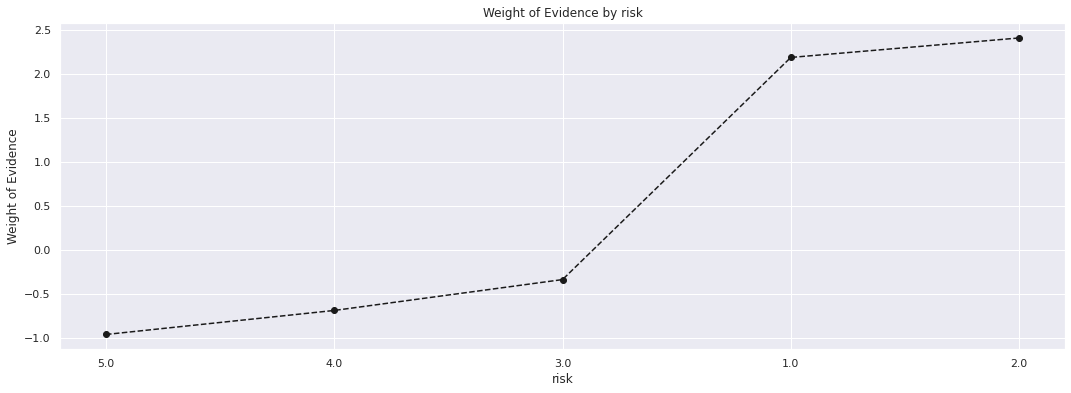

In [9]:
print(woe_discrete(X_train_with_missing, 'risk', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'risk', y_train))

   q126  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     3     30   0.900000    0.015440    27.0    3.0     0.014392    0.044776   
1     2    382   0.965969    0.196603   369.0   13.0     0.196695    0.194030   
2     1   1531   0.966688    0.787957  1480.0   51.0     0.788913    0.761194   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.134980             NaN       NaN  0.035513  
1  0.013643        0.065969  1.148623  0.035513  
2  0.035767        0.000720  0.022124  0.035513  


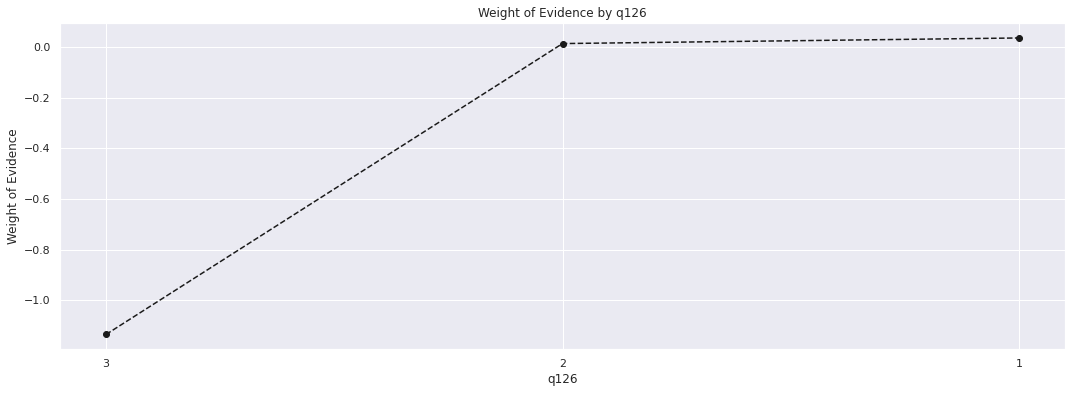

In [10]:
print(woe_discrete(X_train_with_missing, 'q126', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q126', y_train))

In [13]:
# deal with race
X_train_with_missing['q144'].value_counts()
X_train_with_missing['q144_new']='DK'
X_train_with_missing.loc[(X_train_with_missing['q144']==1)|(df_new['q144']==2)|(df_new['q144']==3),'q144_new'] = 'white'
X_train_with_missing.loc[(X_train_with_missing['q144']==4)|(df_new['q144']==5)|(df_new['q144']==6)|(df_new['q144']==7),'q144_new'] = 'mixed'
X_train_with_missing.loc[(X_train_with_missing['q144']==8)|(df_new['q144']==9)|(df_new['q144']==10)|(df_new['q144']==11)|(df_new['q144']==15),'q144_new'] = 'asian'
X_train_with_missing.loc[(X_train_with_missing['q144']==12)|(df_new['q144']==13)|(df_new['q144']==14),'q144_new'] = 'black'
X_train_with_missing.loc[(X_train_with_missing['q144']==16),'q144_new'] = 'other'
X_train_with_missing['q144_new'].value_counts()

white    1493
DK        352
asian      58
mixed      20
black      20
Name: q144_new, dtype: int64

  q144_new  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    black     20   0.700000    0.010741    14.0    6.0     0.008526   
1    asian     52   0.788462    0.027927    41.0   11.0     0.024970   
2    mixed     18   0.833333    0.009667    15.0    3.0     0.009135   
3       DK    324   0.873457    0.174006   283.0   41.0     0.172351   
4    white   1448   0.890193    0.777658  1289.0  159.0     0.785018   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.027273 -1.162745             NaN       NaN  0.047226  
1    0.050000 -0.694366        0.088462  0.468379  0.047226  
2    0.013636 -0.400605        0.044872  0.293761  0.047226  
3    0.186364 -0.078168        0.040123  0.322437  0.047226  
4    0.722727  0.082675        0.016737  0.160843  0.047226  


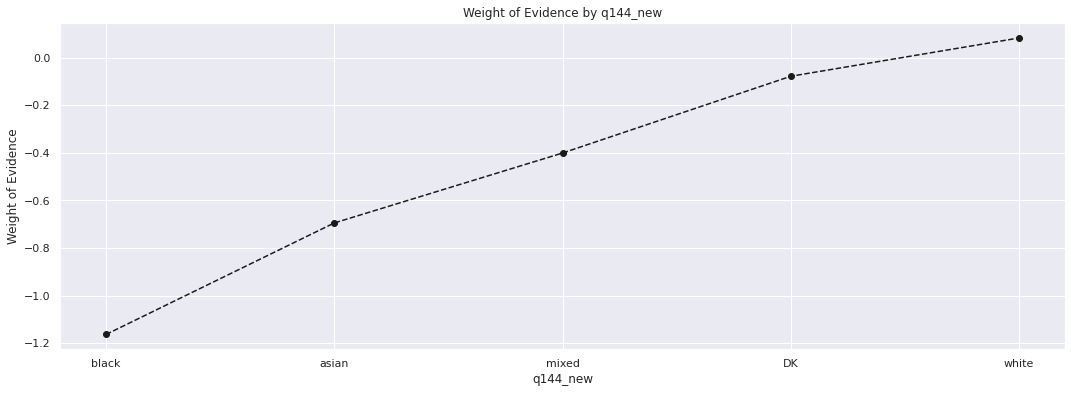

In [29]:
print(woe_discrete(X_train_with_missing, 'q144_new', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q144_new', y_train))

   q7q8  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     1    230   0.804348    0.123523   185.0   45.0     0.112667    0.204545   
1     2    619   0.843296    0.332438   522.0   97.0     0.317905    0.440909   
2     3    772   0.914508    0.414608   706.0   66.0     0.429963    0.300000   
3     4    166   0.939759    0.089151   156.0   10.0     0.095006    0.045455   
4     5     59   0.966102    0.031686    57.0    2.0     0.034714    0.009091   
5     6     16   1.000000    0.008593    16.0    0.0     0.009744    0.000000   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.596349             NaN       NaN  inf  
1 -0.327086        0.038948  0.269263  inf  
2  0.359918        0.071212  0.687004  inf  
3  0.737228        0.025251  0.377310  inf  
4  1.339861        0.026343  0.602633  inf  
5       inf        0.033898       inf  inf  
   q7q8  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     1    230   0.804348    0.12459

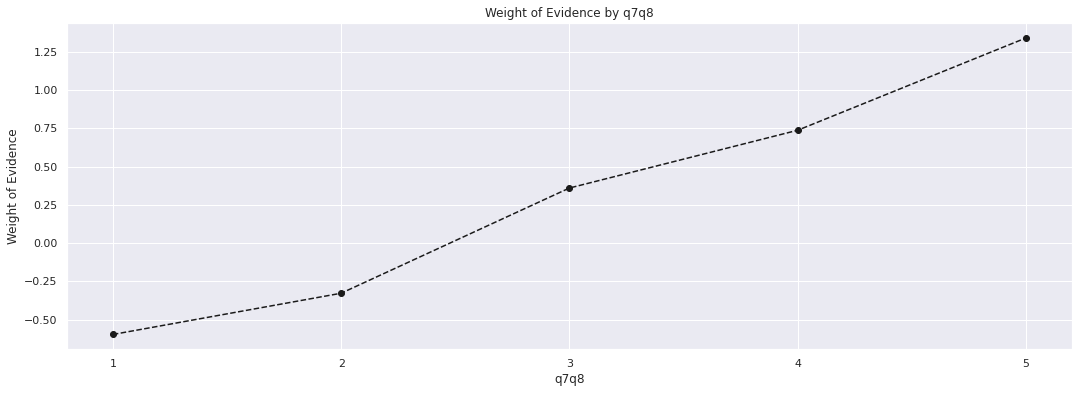

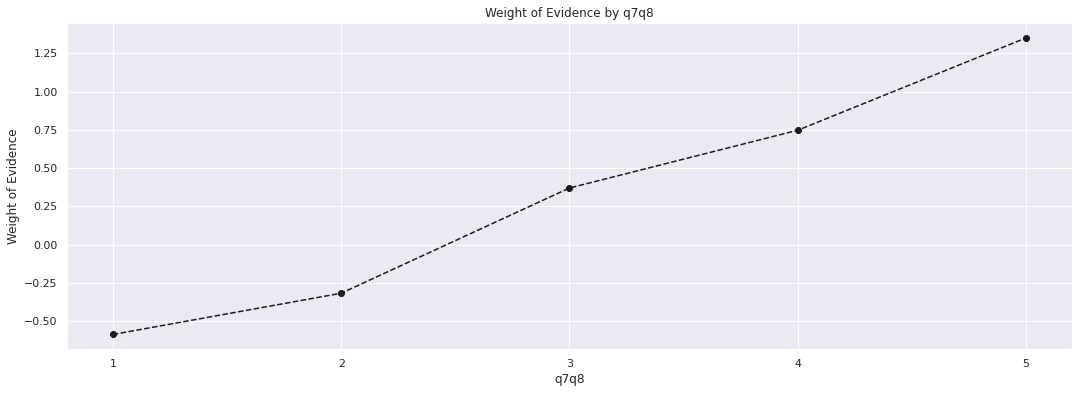

In [30]:
print(woe_discrete(X_train_with_missing, 'q7q8', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q7q8', y_train))

X_train_with_missing1=X_train_with_missing.copy()
X_train_with_missing1['q7q8'].replace(6, None, inplace=True)
print(woe_discrete(X_train_with_missing1, 'q7q8', y_train))
plot_by_woe(woe_discrete(X_train_with_missing1, 'q7q8', y_train))


    q9  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0    1     83   0.674699    0.044576    56.0   27.0     0.034105    0.122727   
1    2     99   0.777778    0.053169    77.0   22.0     0.046894    0.100000   
2    4     83   0.795181    0.044576    66.0   17.0     0.040195    0.077273   
3    5    193   0.844560    0.103652   163.0   30.0     0.099269    0.136364   
4    3     66   0.878788    0.035446    58.0    8.0     0.035323    0.036364   
5    7    248   0.887097    0.133190   220.0   28.0     0.133983    0.127273   
6   14    165   0.890909    0.088614   147.0   18.0     0.089525    0.081818   
7    6    189   0.899471    0.101504   170.0   19.0     0.103532    0.086364   
8    8    315   0.911111    0.169173   287.0   28.0     0.174787    0.127273   
9   10     79   0.924051    0.042427    73.0    6.0     0.044458    0.027273   
10  15    172   0.924419    0.092374   159.0   13.0     0.096833    0.059091   
11  12     21   0.952381    0.011278    

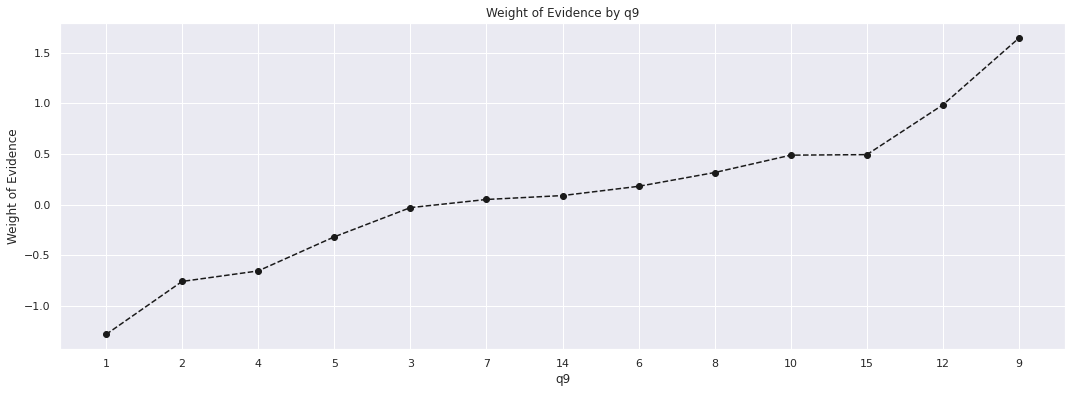

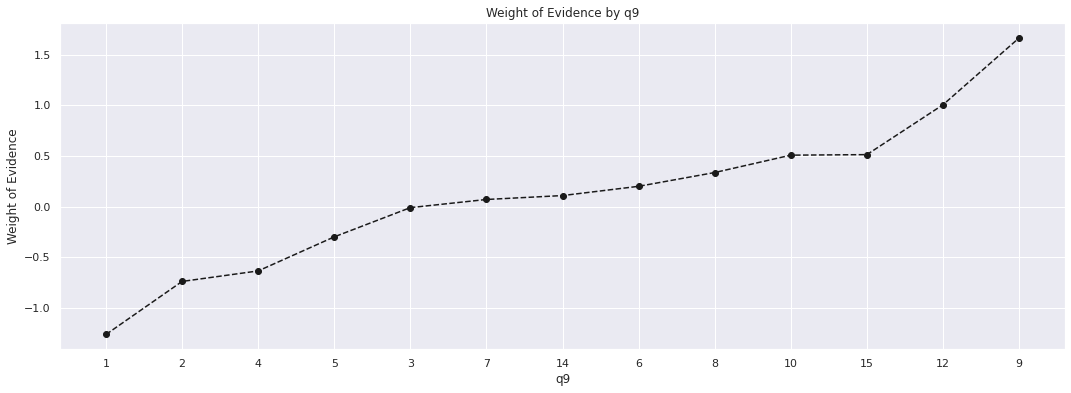

In [31]:
print(woe_discrete(X_train_with_missing, 'q9', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q9', y_train))

X_train_with_missing1=X_train_with_missing.copy()
X_train_with_missing1['q9'].replace(11, None, inplace=True)
print(woe_discrete(X_train_with_missing1, 'q9', y_train))
plot_by_woe(woe_discrete(X_train_with_missing1, 'q9', y_train))

   q11  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0    5    132   0.803030    0.070892   106.0   26.0     0.064555    0.118182   
1    3    302   0.850993    0.162191   257.0   45.0     0.156516    0.204545   
2    6    234   0.871795    0.125671   204.0   30.0     0.124239    0.136364   
3    4    198   0.883838    0.106337   175.0   23.0     0.106577    0.104545   
4    9    223   0.887892    0.119764   198.0   25.0     0.120585    0.113636   
5    2    150   0.893333    0.080559   134.0   16.0     0.081608    0.072727   
6    8    101   0.900990    0.054243    91.0   10.0     0.055420    0.045455   
7    7    353   0.912181    0.189581   322.0   31.0     0.196102    0.140909   
8    1    169   0.917160    0.090763   155.0   14.0     0.094397    0.063636   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.604700             NaN       NaN  0.080233  
1 -0.267629        0.047963  0.337071  0.080233  
2 -0.093120        0.020801  0.174509  0.080233  

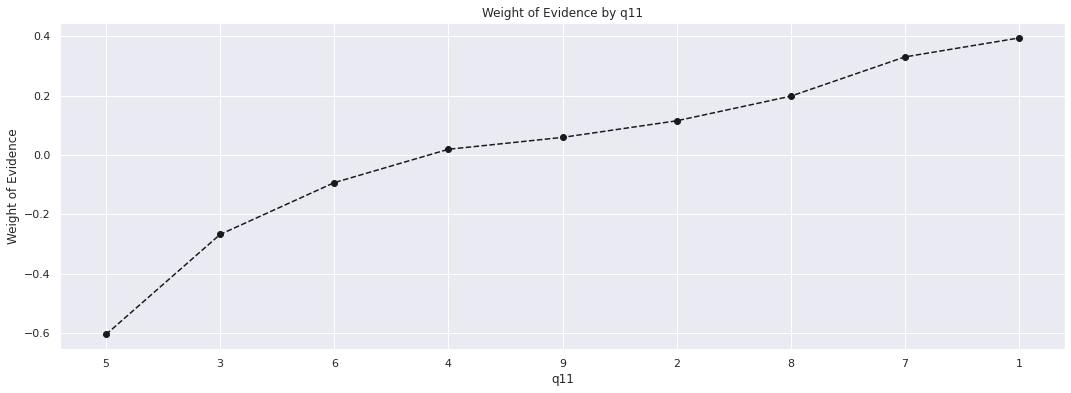

In [32]:
print(woe_discrete(X_train_with_missing, 'q11', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q11', y_train))

   q11a  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   1.0   1105   0.888688    0.677083   982.0  123.0     0.673988    0.702857   
1   2.0    524   0.900763    0.321078   472.0   52.0     0.323953    0.297143   
2   3.0      2   1.000000    0.001225     2.0    0.0     0.001373    0.000000   
3   4.0      1   1.000000    0.000613     1.0    0.0     0.000686    0.000000   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.041942             NaN       NaN  inf  
1  0.086386        0.012076  0.128328  inf  
2       inf        0.099237       inf  inf  
3       inf        0.000000       NaN  inf  
   q11a  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   1.0   1105   0.888688     0.67833   982.0  123.0     0.675378    0.702857   
1   2.0    524   0.900763     0.32167   472.0   52.0     0.324622    0.297143   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.039881             NaN       NaN  0.003526  
1  0.088448        0.0120

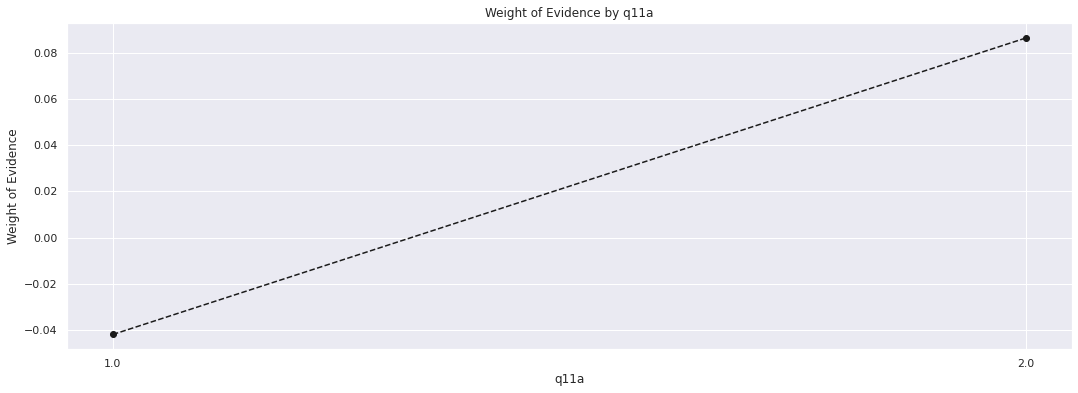

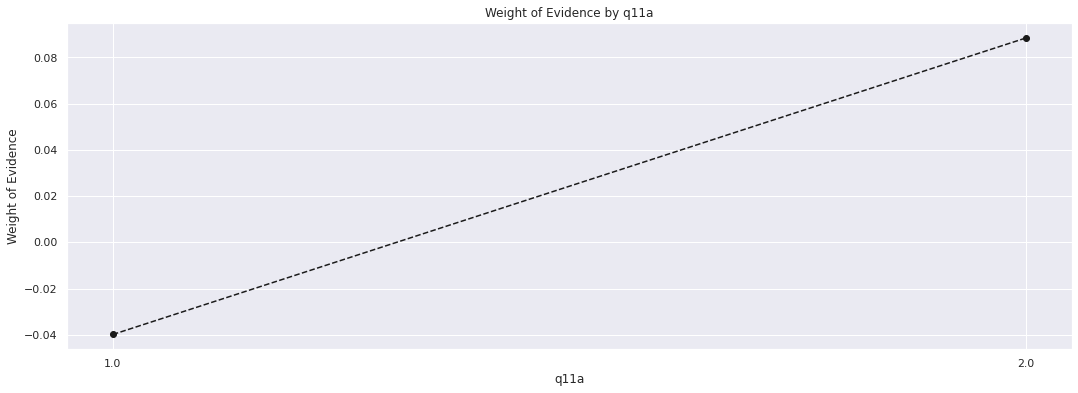

In [33]:
print(woe_discrete(X_train_with_missing, 'q11a', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q11a', y_train))

X_train_with_missing1=X_train_with_missing.copy()
X_train_with_missing1['q11a'].replace([3,4], None, inplace=True)
print(woe_discrete(X_train_with_missing1, 'q11a', y_train))
plot_by_woe(woe_discrete(X_train_with_missing1, 'q11a', y_train))

   q12  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0    1    311   0.832797    0.167025   259.0   52.0     0.157734    0.236364   
1    2    138   0.884058    0.074114   122.0   16.0     0.074300    0.072727   
2    4   1338   0.891629    0.718582  1193.0  145.0     0.726553    0.659091   
3    3     75   0.906667    0.040279    68.0    7.0     0.041413    0.031818   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.404458             NaN       NaN  0.040939  
1  0.021390        0.051261  0.425848  0.040939  
2  0.097450        0.007571  0.076060  0.040939  
3  0.263555        0.015037  0.166105  0.040939  


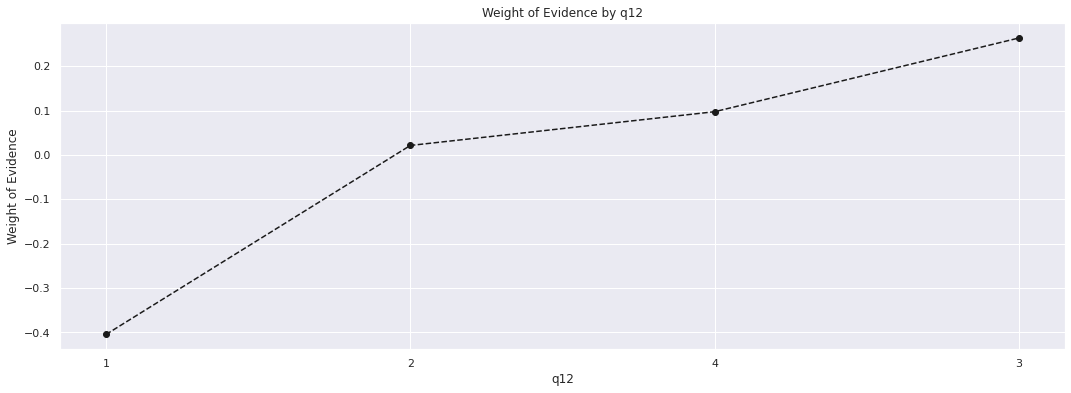

In [34]:
print(woe_discrete(X_train_with_missing, 'q12', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q12', y_train))

   q13  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0    1     50   0.680000    0.026853    34.0   16.0     0.020706    0.072727   
1    3    189   0.761905    0.101504   144.0   45.0     0.087698    0.204545   
2    2    108   0.824074    0.058002    89.0   19.0     0.054202    0.086364   
3    4    207   0.859903    0.111171   178.0   29.0     0.108404    0.131818   
4    5    313   0.910543    0.168099   285.0   28.0     0.173569    0.127273   
5    6    995   0.916583    0.534372   912.0   83.0     0.555420    0.377273   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.256271             NaN       NaN  0.267133  
1 -0.846892        0.081905  0.409379  0.267133  
2 -0.465845        0.062169  0.381047  0.267133  
3 -0.195555        0.035829  0.270290  0.267133  
4  0.310242        0.050640  0.505797  0.267133  
5  0.386757        0.006040  0.076515  0.267133  


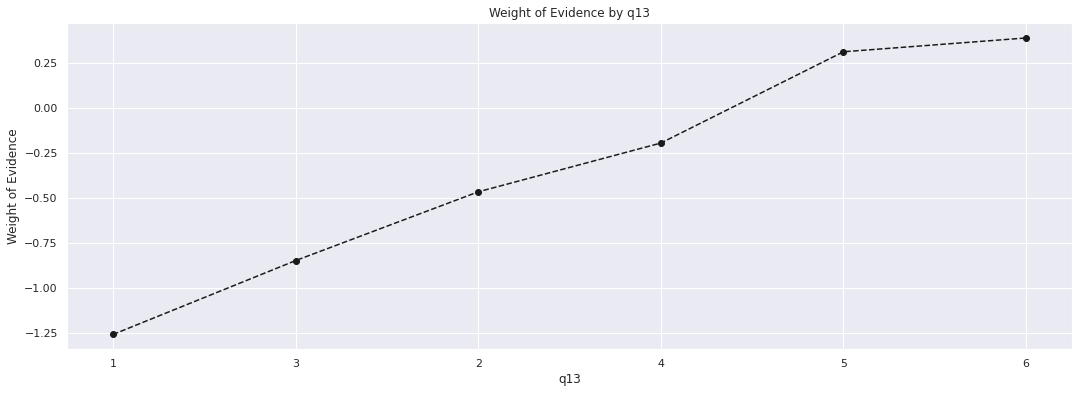

In [35]:
print(woe_discrete(X_train_with_missing, 'q13', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q13', y_train))

   q13a  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   2.0    290   0.803448    0.248500   233.0   57.0     0.229331    0.377483   
1   3.0    570   0.882456    0.488432   503.0   67.0     0.495079    0.443709   
2   1.0    307   0.912052    0.263068   280.0   27.0     0.275591    0.178808   

        WoE  diff_prop_good  diff_WoE       IV  
0 -0.498362             NaN       NaN  0.12133  
1  0.109549        0.079008  0.607910  0.12133  
2  0.432604        0.029596  0.323055  0.12133  


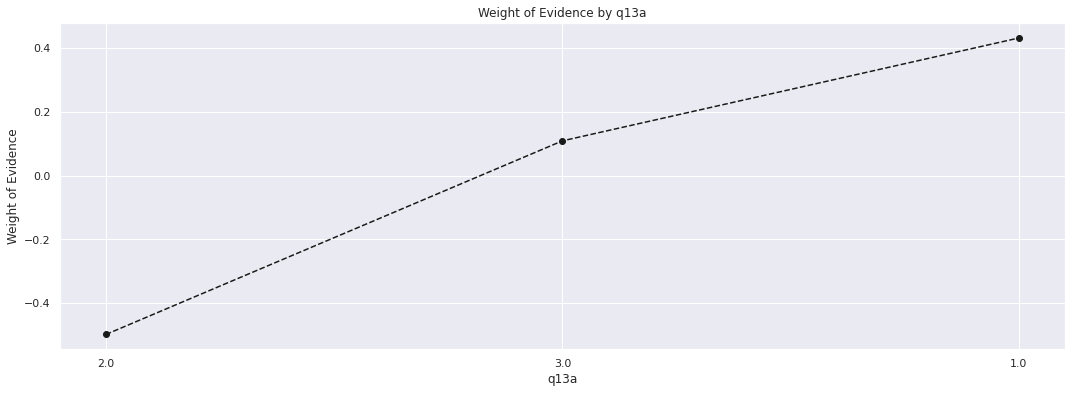

In [36]:
print(woe_discrete(X_train_with_missing, 'q13a', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q13a', y_train))

   q13b  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   2.0    101   0.841584    0.115165    85.0   16.0     0.108557    0.170213   
1   3.0    140   0.857143    0.159635   120.0   20.0     0.153257    0.212766   
2   1.0     88   0.863636    0.100342    76.0   12.0     0.097063    0.127660   
3   4.0    139   0.884892    0.158495   123.0   16.0     0.157088    0.170213   
4   5.0    116   0.913793    0.132269   106.0   10.0     0.135377    0.106383   
5   6.0    293   0.931741    0.334094   273.0   20.0     0.348659    0.212766   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.449775             NaN       NaN  0.130798  
1 -0.328078        0.015559  0.121697  0.130798  
2 -0.274011        0.006494  0.054067  0.130798  
3 -0.080242        0.021256  0.193769  0.130798  
4  0.241016        0.028901  0.321258  0.130798  
5  0.493902        0.017948  0.252886  0.130798  


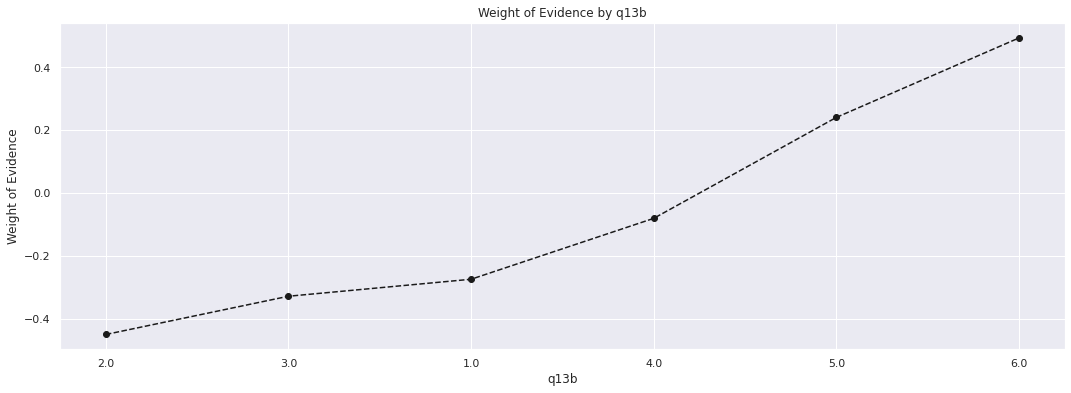

In [37]:
print(woe_discrete(X_train_with_missing, 'q13b', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q13b', y_train))

   q14a  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   2.0    117   0.683761    0.740506    80.0   37.0     0.707965    0.822222   
1   1.0     41   0.804878    0.259494    33.0    8.0     0.292035    0.177778   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.149617             NaN       NaN  0.073806  
1  0.496341        0.121117  0.645957  0.073806  


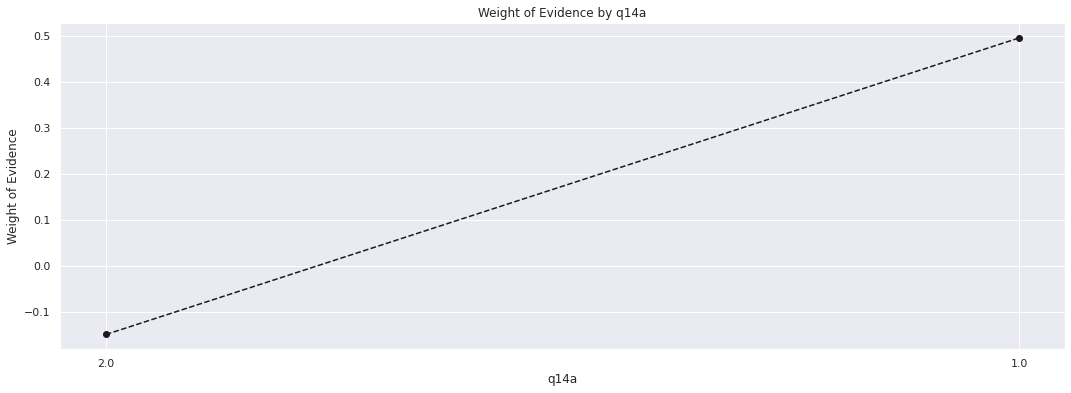

In [38]:
print(woe_discrete(X_train_with_missing, 'q14a', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q14a', y_train))

   q14y  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     2    519   0.826590    0.278733   429.0   90.0     0.261267    0.409091   
1     1   1343   0.903202    0.721267  1213.0  130.0     0.738733    0.590909   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.448395             NaN       NaN  0.099289  
1  0.223275        0.076612   0.67167  0.099289  


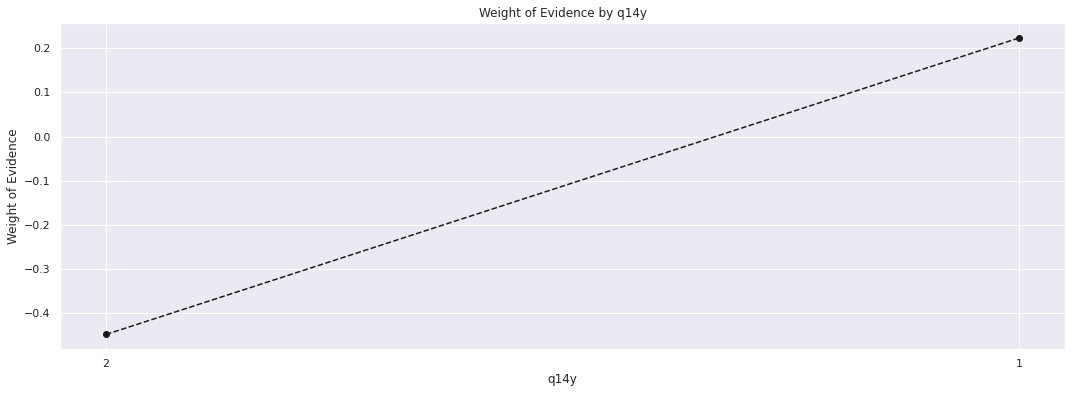

In [39]:
print(woe_discrete(X_train_with_missing, 'q14y', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q14y', y_train))

   q14ysu2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        4    519   0.826590    0.278733   429.0   90.0     0.261267   
1        3     67   0.865672    0.035983    58.0    9.0     0.035323   
2        2    382   0.876963    0.205156   335.0   47.0     0.204019   
3        1    894   0.917226    0.480129   820.0   74.0     0.499391   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.409091 -0.448395             NaN       NaN  0.131975  
1    0.040909 -0.146824        0.039082  0.301571  0.131975  
2    0.213636 -0.046060        0.011292  0.100764  0.131975  
3    0.336364  0.395197        0.040263  0.441256  0.131975  


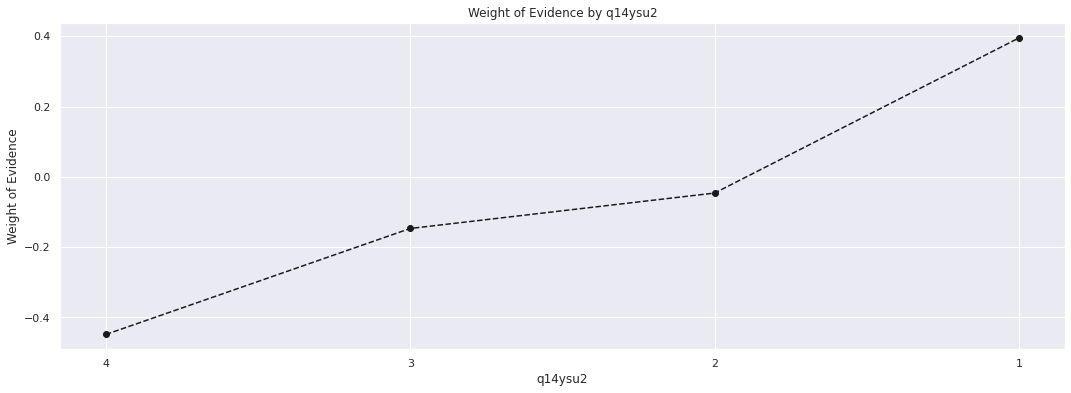

In [40]:
print(woe_discrete(X_train_with_missing, 'q14ysu2', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q14ysu2', y_train))

   q15_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    0.0   1021   0.834476    0.549812   852.0  169.0     0.520464   
1    1.0    836   0.938995    0.450188   785.0   51.0     0.479536   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.768182 -0.389305             NaN       NaN  0.276495  
1    0.231818  0.726865        0.104519   1.11617  0.276495  


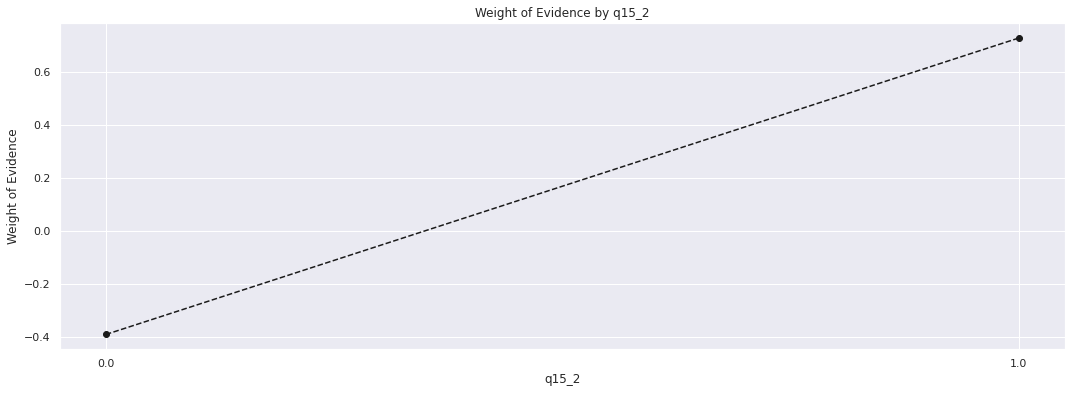

In [41]:
print(woe_discrete(X_train_with_missing, 'q15_2', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q15_2', y_train))

In [42]:
# create a new column filled with nan values
X_train_with_missing['q15b_new'] = None
X_train_with_missing.loc[(X_train_with_missing['q15b_1']==1)|(X_train_with_missing['q15b_2']==1)|(X_train_with_missing['q15b_3']==1),'q15b_new'] = 1
X_train_with_missing.loc[(X_train_with_missing['q15b_1']==2)|(X_train_with_missing['q15b_2']==2)|(X_train_with_missing['q15b_3']==2),'q15b_new'] = 2
X_train_with_missing.loc[(X_train_with_missing['q15b_1']==3)|(X_train_with_missing['q15b_2']==3)|(X_train_with_missing['q15b_3']==3),'q15b_new'] = 3
X_train_with_missing.loc[(X_train_with_missing['q15b_1']==4)|(X_train_with_missing['q15b_2']==4)|(X_train_with_missing['q15b_3']==4),'q15b_new'] = 4
X_train_with_missing['q15b_new'].value_counts()

/tmp/ipykernel_682341/1570191844.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_with_missing['q15b_new'] = None


1    1493
2     105
3      65
4      30
Name: q15b_new, dtype: int64

   q15b_new  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0         2    105   0.752381    0.062020    79.0   26.0     0.051974   
1         3     65   0.830769    0.038393    54.0   11.0     0.035526   
2         4     30   0.833333    0.017720    25.0    5.0     0.016447   
3         1   1493   0.912257    0.881867  1362.0  131.0     0.896053   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.150289 -1.061823             NaN       NaN  0.151116  
1    0.063584 -0.582085        0.078388  0.479737  0.151116  
2    0.028902 -0.563736        0.002564  0.018349  0.151116  
3    0.757225  0.168338        0.078924  0.732074  0.151116  


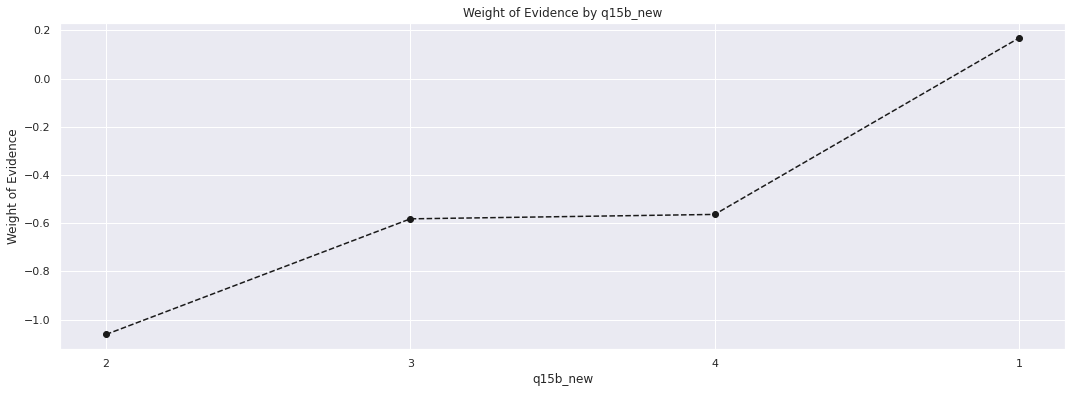

In [43]:
print(woe_discrete(X_train_with_missing, 'q15b_new', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q15b_new', y_train))

   q15c  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   3.0    566   0.890459    0.796062   504.0   62.0     0.786271    0.885714   
1   1.0     99   0.939394    0.139241    93.0    6.0     0.145086    0.085714   
2   2.0     46   0.956522    0.064698    44.0    2.0     0.068643    0.028571   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.119092             NaN       NaN  0.078213  
1  0.526306        0.048935  0.645398  0.078213  
2  0.876508        0.017128  0.350202  0.078213  


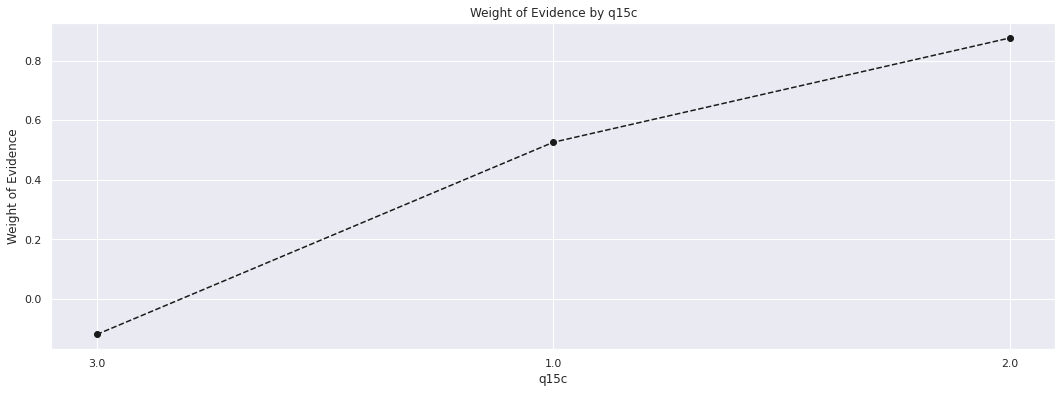

In [44]:
print(woe_discrete(X_train_with_missing, 'q15c', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q15c', y_train))

   q15d2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      3    497   0.778672    0.266917   387.0  110.0     0.235688   
1      2    281   0.846975    0.150913   238.0   43.0     0.144945   
2      1   1084   0.938192    0.582170  1017.0   67.0     0.619367   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.500000 -0.752098             NaN       NaN  0.437374  
1    0.195455 -0.298972        0.068303  0.453126  0.437374  
2    0.304545  0.709877        0.091217  1.008849  0.437374  


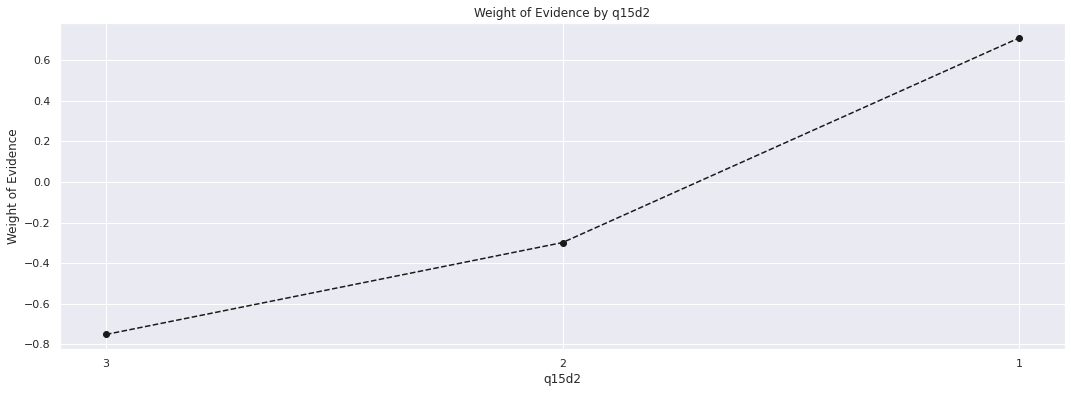

In [45]:
print(woe_discrete(X_train_with_missing, 'q15d2', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q15d2', y_train))

   q15z  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     3      2   0.500000    0.001074     1.0    1.0     0.000609    0.004545   
1     2   1758   0.882253    0.944146  1551.0  207.0     0.944580    0.940909   
2     1    102   0.882353    0.054780    90.0   12.0     0.054811    0.054545   

        WoE  diff_prop_good  diff_WoE        IV  
0 -2.010043             NaN       NaN  0.007928  
1  0.003894        0.382253  2.013936  0.007928  
2  0.004860        0.000100  0.000967  0.007928  


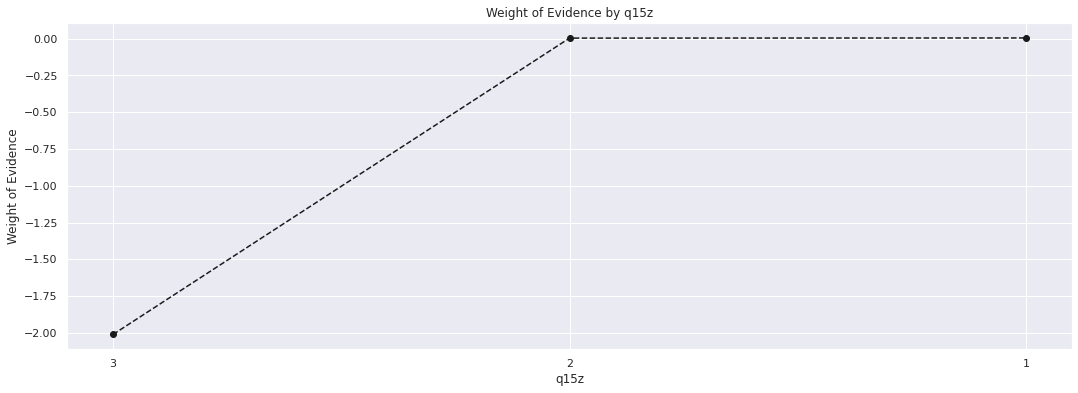

In [46]:
print(woe_discrete(X_train_with_missing, 'q15z', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q15z', y_train))

In [47]:
# create a new column filled with nan values
X_train_with_missing['q17_new'] = None
col_list = X_train_with_missing.filter(like='q17_').columns.tolist()
for i in col_list:
    print(i)
    X_train_with_missing.loc[(X_train_with_missing[i]==0),'q17_new'] = 0
    X_train_with_missing.loc[(X_train_with_missing[i]==1),'q17_new'] = 1
    


q17_1
q17_2
q17_3
q17_4
q17_5
q17_6
q17_7
q17_8
q17_9
q17_10
q17_11
q17_12
q17_13
q17_14
q17_15
q17_16
q17_17
q17_18
q17_19
q17_new


/tmp/ipykernel_682341/3918327864.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_with_missing['q17_new'] = None


   q17_1  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    1.0      7   0.428571    0.044304     3.0    4.0      0.02439   
1    0.0    151   0.794702    0.955696   120.0   31.0      0.97561   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.114286 -1.544518             NaN       NaN  0.147535  
1    0.885714  0.096668        0.366131  1.641187  0.147535  


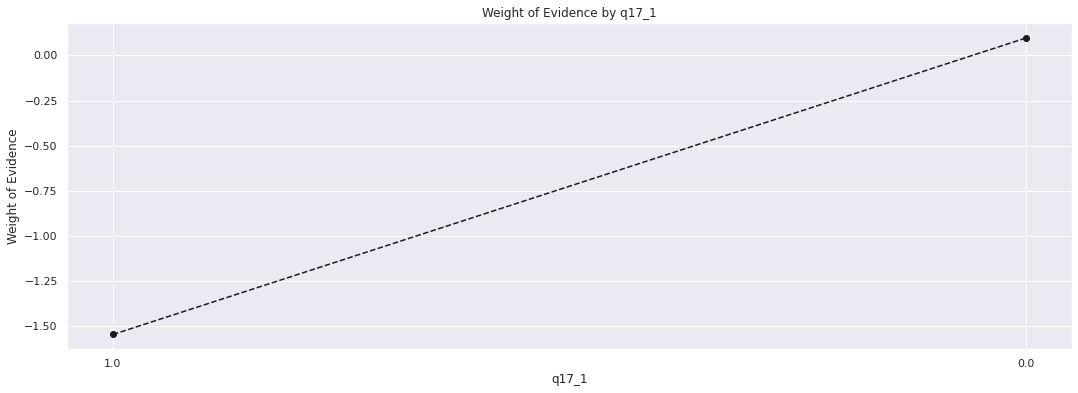

In [49]:
print(woe_discrete(X_train_with_missing, 'q17_1', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q17_1', y_train))

   q24a  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     3    260   0.726923    0.139635   189.0   71.0     0.115104    0.322727   
1     2    797   0.853199    0.428034   680.0  117.0     0.414129    0.531818   
2     1    805   0.960248    0.432331   773.0   32.0     0.470767    0.145455   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.030976             NaN       NaN  0.625572  
1 -0.250124        0.126276  0.780852  0.625572  
2  1.174500        0.107049  1.424624  0.625572  


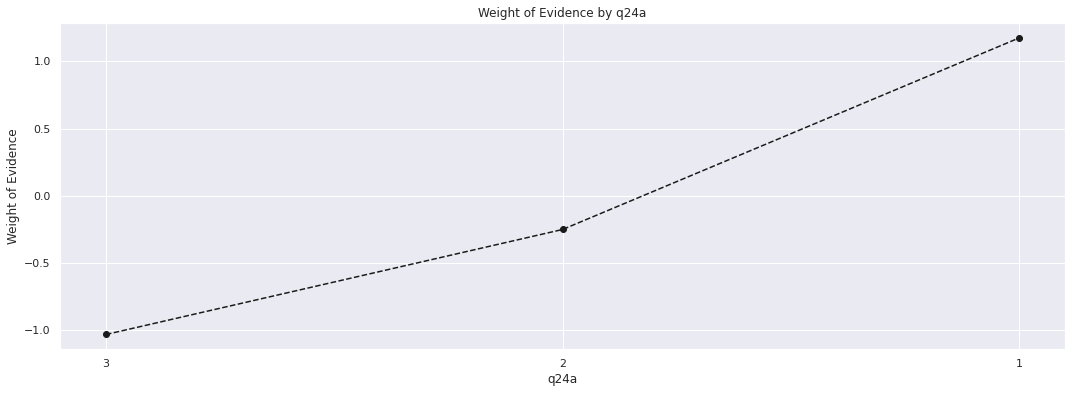

In [32]:
print(woe_discrete(X_train_with_missing, 'q24a', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q24a', y_train))

   q24b  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     1    100   0.560000    0.053706    56.0   44.0     0.034105    0.200000   
1     3     43   0.674419    0.023093    29.0   14.0     0.017661    0.063636   
2     4     61   0.688525    0.032760    42.0   19.0     0.025579    0.086364   
3     2     36   0.777778    0.019334    28.0    8.0     0.017052    0.036364   
4     5    218   0.825688    0.117078   180.0   38.0     0.109622    0.172727   
5     6    131   0.877863    0.070354   115.0   16.0     0.070037    0.072727   
6     7    275   0.923636    0.147691   254.0   21.0     0.154689    0.095455   
7     8    457   0.927790    0.245435   424.0   33.0     0.258222    0.150000   
8     9    209   0.947368    0.112245   198.0   11.0     0.120585    0.050000   
9    10    332   0.951807    0.178303   316.0   16.0     0.192448    0.072727   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.768881             NaN       NaN  0.735782  
1 -1.281

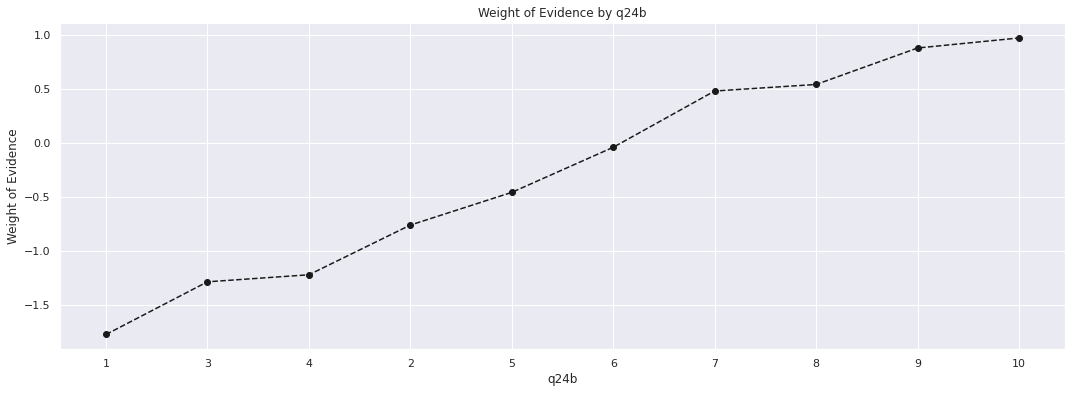

In [33]:
print(woe_discrete(X_train_with_missing, 'q24b', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q24b', y_train))

   q24c  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0     1    126   0.714286    0.067669    90.0   36.0     0.054811    0.163636   
1     2     79   0.746835    0.042427    59.0   20.0     0.035932    0.090909   
2     3     89   0.808989    0.047798    72.0   17.0     0.043849    0.077273   
3     4    137   0.854015    0.073577   117.0   20.0     0.071255    0.090909   
4     5    418   0.875598    0.224490   366.0   52.0     0.222899    0.236364   
5    10     62   0.887097    0.033298    55.0    7.0     0.033496    0.031818   
6     7    347   0.913545    0.186359   317.0   30.0     0.193057    0.136364   
7     6    239   0.924686    0.128357   221.0   18.0     0.134592    0.081818   
8     8    294   0.938776    0.157895   276.0   18.0     0.168088    0.081818   
9     9     71   0.971831    0.038131    69.0    2.0     0.042022    0.009091   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.093752             NaN       NaN  0.353167  
1 -0.928

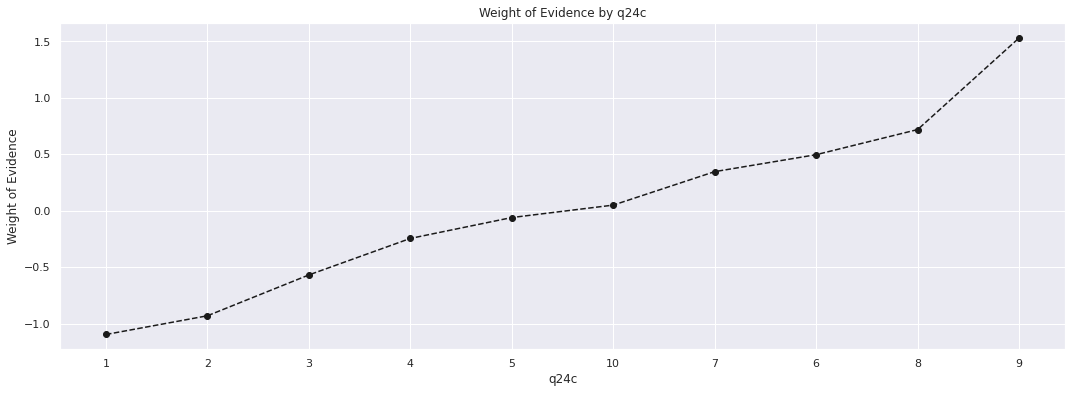

In [34]:
print(woe_discrete(X_train_with_missing, 'q24c', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q24c', y_train))

In [35]:
for i in X_train_with_missing.filter(like='q26_').columns.tolist():
    print(i)
    print(woe_discrete(X_train_with_missing, i, y_train))
    # plot_by_woe(woe_discrete(X_train_with_missing, i, y_train))

q26_1
   q26_1  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    0.0   1140   0.868421    0.861678   990.0  150.0     0.859375   
1    1.0    183   0.885246    0.138322   162.0   21.0     0.140625   

   prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0    0.877193 -0.020522             NaN       NaN  0.00278  
1    0.122807  0.135483        0.016825  0.156004  0.00278  
q26_2
   q26_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    1.0    237   0.793249    0.179138   188.0   49.0     0.163194   
1    0.0   1086   0.887661    0.820862   964.0  122.0     0.836806   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.28655 -0.562970             NaN       NaN  0.089118  
1     0.71345  0.159479        0.094412  0.722449  0.089118  
q26_3
   q26_3  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    1.0     21   0.809524    0.015873    17.0    4.0     0.014757   
1    0.0   1302   0.871736    0.984127  1135.0  167

   q27  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0  1.0     65   0.723077    0.049131    47.0   18.0     0.040799    0.105263   
1  2.0    313   0.843450    0.236584   264.0   49.0     0.229167    0.286550   
2  3.0    453   0.869757    0.342404   394.0   59.0     0.342014    0.345029   
3  4.0    390   0.900000    0.294785   351.0   39.0     0.304688    0.228070   
4  5.0    102   0.941176    0.077098    96.0    6.0     0.083333    0.035088   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.947815             NaN       NaN  0.137873  
1 -0.223462        0.120374  0.724353  0.137873  
2 -0.008778        0.026307  0.214685  0.137873  
3  0.289633        0.030243  0.298411  0.137873  
4  0.864997        0.041176  0.575364  0.137873  


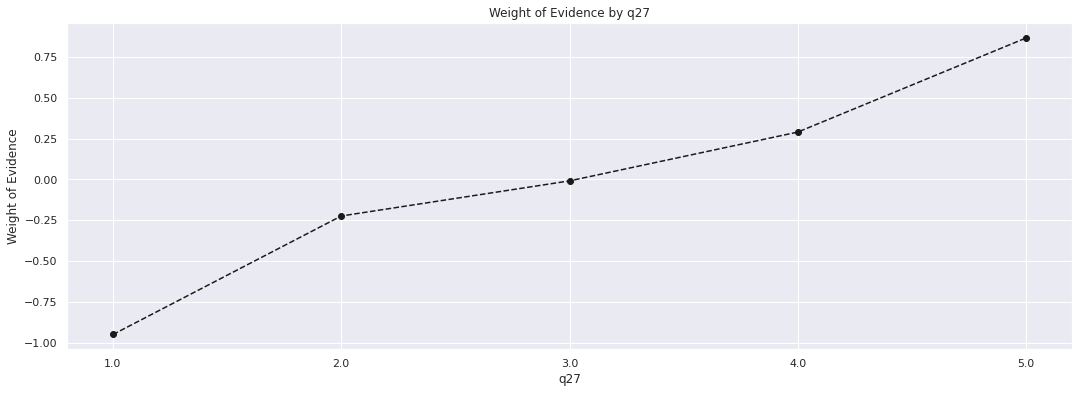

In [36]:
print(woe_discrete(X_train_with_missing, 'q27', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q27', y_train))

In [37]:
for i in X_train_with_missing.filter(like='q28_').columns.tolist():
    print(i)
    print(woe_discrete(X_train_with_missing, i, y_train))
    # plot_by_woe(woe_discrete(X_train_with_missing, i, y_train))

q28_1
   q28_1  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    1.0    173   0.797688    0.130763   138.0   35.0     0.119792   
1    0.0   1150   0.881739    0.869237  1014.0  136.0     0.880208   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.204678 -0.535686             NaN       NaN  0.054081  
1    0.795322  0.101412        0.084051  0.637098  0.054081  
q28_2
   q28_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    1.0    239   0.828452     0.18065   198.0   41.0     0.171875   
1    0.0   1084   0.880074     0.81935   954.0  130.0     0.828125   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.239766 -0.332896             NaN       NaN  0.028408  
1    0.760234  0.085538        0.051622  0.418434  0.028408  
q28_3
   q28_3  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    1.0    146   0.808219    0.110355   118.0   28.0     0.102431   
1    0.0   1177   0.878505    0.889645  1034.0  

1    1554
0     298
Name: q35b_53_new, dtype: int64
   q35b_53_new  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0            1   1554   0.869369    0.839093  1351.0  203.0     0.827819   
1            0    298   0.942953    0.160907   281.0   17.0     0.172181   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.922727 -0.108540             NaN       NaN  0.086343  
1    0.077273  0.801207        0.073584  0.909747  0.086343  


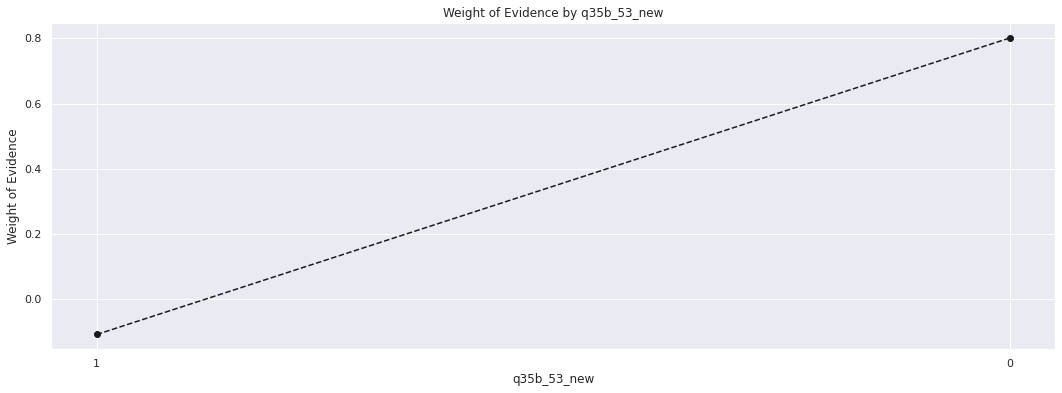

In [38]:
# create a new column filled with nan values
X_train_with_missing['q35b_53_new'] = None
col_list1 = X_train_with_missing.filter(like='q35b_').columns.tolist()
col_list2 = X_train_with_missing.filter(like='q53_').columns.tolist()
for i in col_list1:
    X_train_with_missing.loc[(X_train_with_missing[i]==0),'q35b_53_new'] = 0
for i in col_list2:
    X_train_with_missing.loc[(X_train_with_missing[i]==2),'q35b_53_new'] = 0
for i in col_list1:
    X_train_with_missing.loc[(X_train_with_missing[i]==1),'q35b_53_new'] = 1
for i in col_list2:
    X_train_with_missing.loc[(X_train_with_missing[i]==1),'q35b_53_new'] = 1
print(X_train_with_missing['q35b_53_new'].value_counts())
print(woe_discrete(X_train_with_missing, 'q35b_53_new', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q35b_53_new', y_train))


['q36_1_1', 'q36_1_2', 'q36_1_3', 'q36_1_4', 'q36_1_7', 'q36_1_8', 'q36_1_9', 'q36_1_10', 'q36_1_11', 'q36_1_12', 'q36_1_13', 'q36_1_14', 'q36_1_15', 'q36_1_16', 'q36_1_18', 'q36_2_1', 'q36_2_2', 'q36_2_3', 'q36_2_4', 'q36_2_7', 'q36_2_8', 'q36_2_9', 'q36_2_10', 'q36_2_11', 'q36_2_12', 'q36_2_13', 'q36_2_14', 'q36_2_15', 'q36_2_16', 'q36_2_18', 'q36_3_1', 'q36_3_2', 'q36_3_3', 'q36_3_4', 'q36_3_7', 'q36_3_8', 'q36_3_9', 'q36_3_10', 'q36_3_11', 'q36_3_12', 'q36_3_13', 'q36_3_14', 'q36_3_15', 'q36_3_16', 'q36_3_18', 'q36_4_1', 'q36_4_2', 'q36_4_3', 'q36_4_4', 'q36_4_7', 'q36_4_8', 'q36_4_9', 'q36_4_10', 'q36_4_11', 'q36_4_12', 'q36_4_13', 'q36_4_14', 'q36_4_15', 'q36_4_16', 'q36_4_18', 'q36_54_new', 'q54_1', 'q54_2', 'q54_3', 'q54_4', 'q54_7', 'q54_8', 'q54_9', 'q54_10', 'q54_11', 'q54_12', 'q54_13', 'q54_14', 'q54_15', 'q54_16']
15    390
10    164
14    163
9     149
7     140
8     138
6     132
13    124
12    113
5     104
11     97
4      68
16     53
3      27
Name: q36_54_new, dt

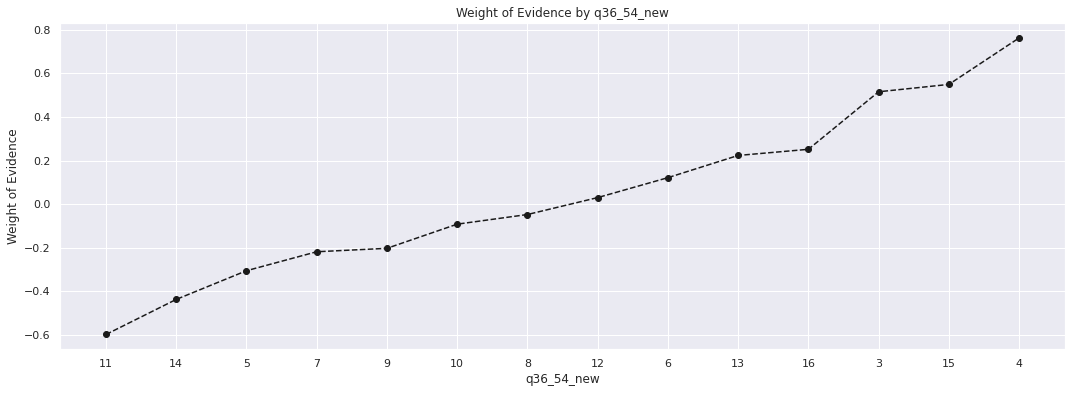

In [39]:
# create a new column filled with nan values
X_train_with_missing['q36_54_new'] = None
col_list = X_train_with_missing.filter(like='q36_').columns.tolist()+X_train_with_missing.filter(like='q54_').columns.tolist()
print(col_list)
for i in col_list:
    X_train_with_missing.loc[(X_train_with_missing[i]==1),'q36_54_new'] = 1
    X_train_with_missing.loc[(X_train_with_missing[i]==2),'q36_54_new'] = 2
    X_train_with_missing.loc[(X_train_with_missing[i]==3),'q36_54_new'] = 3
    X_train_with_missing.loc[(X_train_with_missing[i]==4),'q36_54_new'] = 4
    X_train_with_missing.loc[(X_train_with_missing[i]==5),'q36_54_new'] = 5
    X_train_with_missing.loc[(X_train_with_missing[i]==6),'q36_54_new'] = 6
    X_train_with_missing.loc[(X_train_with_missing[i]==7),'q36_54_new'] = 7
    X_train_with_missing.loc[(X_train_with_missing[i]==8),'q36_54_new'] = 8
    X_train_with_missing.loc[(X_train_with_missing[i]==9),'q36_54_new'] = 9
    X_train_with_missing.loc[(X_train_with_missing[i]==10),'q36_54_new'] = 10
    X_train_with_missing.loc[(X_train_with_missing[i]==11),'q36_54_new'] = 11
    X_train_with_missing.loc[(X_train_with_missing[i]==12),'q36_54_new'] = 12
    X_train_with_missing.loc[(X_train_with_missing[i]==13),'q36_54_new'] = 13
    X_train_with_missing.loc[(X_train_with_missing[i]==14),'q36_54_new'] = 14
    X_train_with_missing.loc[(X_train_with_missing[i]==15),'q36_54_new'] = 15
    X_train_with_missing.loc[(X_train_with_missing[i]==16),'q36_54_new'] = 16
print(X_train_with_missing['q36_54_new'].value_counts())
print(woe_discrete(X_train_with_missing, 'q36_54_new', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q36_54_new', y_train))

['q38_1_1', 'q38_1_2', 'q38_1_3', 'q38_1_4', 'q38_1_7', 'q38_1_8', 'q38_1_9', 'q38_1_10', 'q38_1_11', 'q38_1_12', 'q38_1_13', 'q38_1_14', 'q38_1_15', 'q38_1_16', 'q38_1_18', 'q38_2_1', 'q38_2_2', 'q38_2_3', 'q38_2_4', 'q38_2_7', 'q38_2_8', 'q38_2_9', 'q38_2_10', 'q38_2_11', 'q38_2_12', 'q38_2_13', 'q38_2_14', 'q38_2_15', 'q38_2_16', 'q38_2_18', 'q38_3_1', 'q38_3_2', 'q38_3_3', 'q38_3_4', 'q38_3_7', 'q38_3_8', 'q38_3_9', 'q38_3_10', 'q38_3_11', 'q38_3_12', 'q38_3_13', 'q38_3_14', 'q38_3_15', 'q38_3_16', 'q38_3_18', 'q38_4_1', 'q38_4_2', 'q38_4_3', 'q38_4_4', 'q38_4_7', 'q38_4_8', 'q38_4_9', 'q38_4_10', 'q38_4_11', 'q38_4_12', 'q38_4_13', 'q38_4_14', 'q38_4_15', 'q38_4_16', 'q38_4_18', 'q38_56_new', 'q56_1', 'q56_2', 'q56_3', 'q56_4', 'q56_7', 'q56_8', 'q56_9', 'q56_10', 'q56_11', 'q56_12', 'q56_13', 'q56_14', 'q56_15', 'q56_16']
1    1510
2      97
3      72
Name: q38_56_new, dtype: int64
   q38_56_new  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0           2     97   0

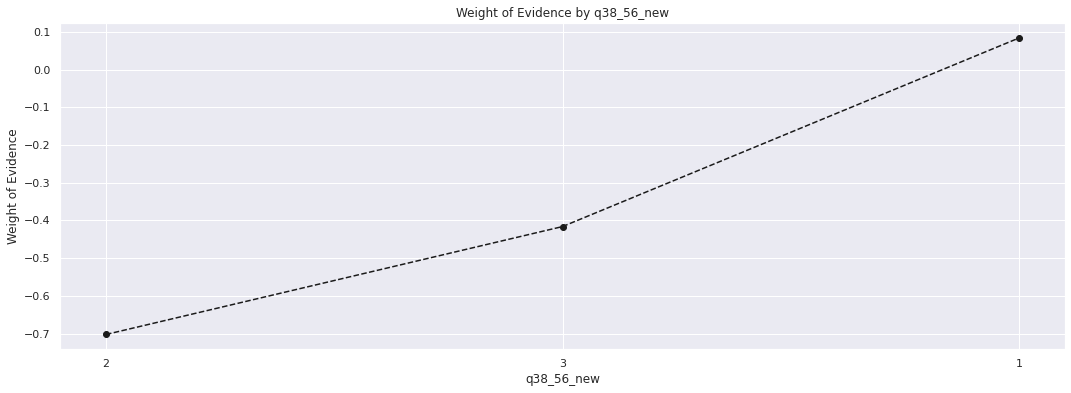

In [40]:
# create a new column filled with nan values
X_train_with_missing['q38_56_new'] = None
col_list = X_train_with_missing.filter(like='q38_').columns.tolist()+X_train_with_missing.filter(like='q56_').columns.tolist()
print(col_list)
for i in col_list:
    X_train_with_missing.loc[(X_train_with_missing[i]==1),'q38_56_new'] = 1
    X_train_with_missing.loc[(X_train_with_missing[i]==2),'q38_56_new'] = 2
    X_train_with_missing.loc[(X_train_with_missing[i]==3),'q38_56_new'] = 3
print(X_train_with_missing['q38_56_new'].value_counts())
print(woe_discrete(X_train_with_missing, 'q38_56_new', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q38_56_new', y_train))

['q42_1_1', 'q42_1_2', 'q42_1_3', 'q42_1_4', 'q42_1_7', 'q42_1_8', 'q42_1_9', 'q42_1_10', 'q42_1_11', 'q42_1_12', 'q42_1_13', 'q42_1_14', 'q42_1_15', 'q42_1_16', 'q42_1_18', 'q42_2_1', 'q42_2_2', 'q42_2_3', 'q42_2_4', 'q42_2_7', 'q42_2_8', 'q42_2_9', 'q42_2_10', 'q42_2_11', 'q42_2_12', 'q42_2_13', 'q42_2_14', 'q42_2_15', 'q42_2_16', 'q42_2_18', 'q42_3_1', 'q42_3_2', 'q42_3_3', 'q42_3_4', 'q42_3_7', 'q42_3_8', 'q42_3_9', 'q42_3_10', 'q42_3_11', 'q42_3_12', 'q42_3_13', 'q42_3_14', 'q42_3_15', 'q42_3_16', 'q42_3_18', 'q42_4_1', 'q42_4_2', 'q42_4_3', 'q42_4_4', 'q42_4_7', 'q42_4_8', 'q42_4_9', 'q42_4_10', 'q42_4_11', 'q42_4_12', 'q42_4_13', 'q42_4_14', 'q42_4_15', 'q42_4_16', 'q42_4_18', 'q42_60_new', 'q60_1', 'q60_2', 'q60_3', 'q60_4', 'q60_7', 'q60_8', 'q60_9', 'q60_10', 'q60_11', 'q60_12', 'q60_13', 'q60_14', 'q60_15', 'q60_16']
2    1018
1     529
3     112
Name: q42_60_new, dtype: int64
   q42_60_new  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0           1    529   0

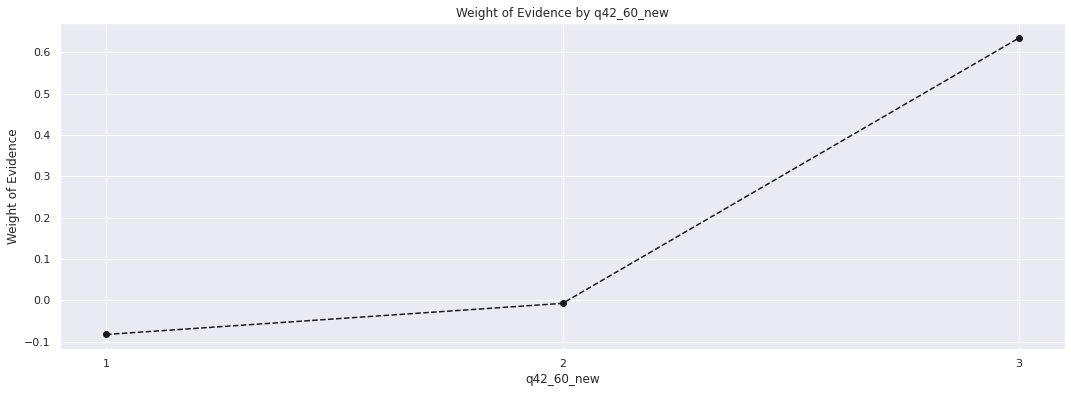

In [41]:
# create a new column filled with nan values
X_train_with_missing['q42_60_new'] = None
col_list = X_train_with_missing.filter(like='q42_').columns.tolist()+X_train_with_missing.filter(like='q60_').columns.tolist()
print(col_list)
for i in col_list:
    X_train_with_missing.loc[(X_train_with_missing[i]==1),'q42_60_new'] = 1
    X_train_with_missing.loc[(X_train_with_missing[i]==2),'q42_60_new'] = 2
    X_train_with_missing.loc[(X_train_with_missing[i]==3),'q42_60_new'] = 3
print(X_train_with_missing['q42_60_new'].value_counts())
print(woe_discrete(X_train_with_missing, 'q42_60_new', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q42_60_new', y_train))

['q43_1_1', 'q43_1_2', 'q43_1_3', 'q43_1_4', 'q43_1_7', 'q43_1_8', 'q43_1_9', 'q43_1_10', 'q43_1_11', 'q43_1_12', 'q43_1_13', 'q43_1_14', 'q43_1_15', 'q43_1_16', 'q43_1_18', 'q43_2_1', 'q43_2_2', 'q43_2_3', 'q43_2_4', 'q43_2_7', 'q43_2_8', 'q43_2_9', 'q43_2_10', 'q43_2_11', 'q43_2_12', 'q43_2_13', 'q43_2_14', 'q43_2_15', 'q43_2_16', 'q43_2_18', 'q43_3_1', 'q43_3_2', 'q43_3_3', 'q43_3_4', 'q43_3_7', 'q43_3_8', 'q43_3_9', 'q43_3_10', 'q43_3_11', 'q43_3_12', 'q43_3_13', 'q43_3_14', 'q43_3_15', 'q43_3_16', 'q43_3_18', 'q43_4_1', 'q43_4_2', 'q43_4_3', 'q43_4_4', 'q43_4_7', 'q43_4_8', 'q43_4_9', 'q43_4_10', 'q43_4_11', 'q43_4_12', 'q43_4_13', 'q43_4_14', 'q43_4_15', 'q43_4_16', 'q43_4_18', 'q43_61_new', 'q61_1', 'q61_2', 'q61_3', 'q61_4', 'q61_7', 'q61_8', 'q61_9', 'q61_10', 'q61_11', 'q61_12', 'q61_13', 'q61_14', 'q61_15', 'q61_16']
1    1032
3     359
2     268
Name: q43_61_new, dtype: int64
   q43_61_new  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0           1   1032   0

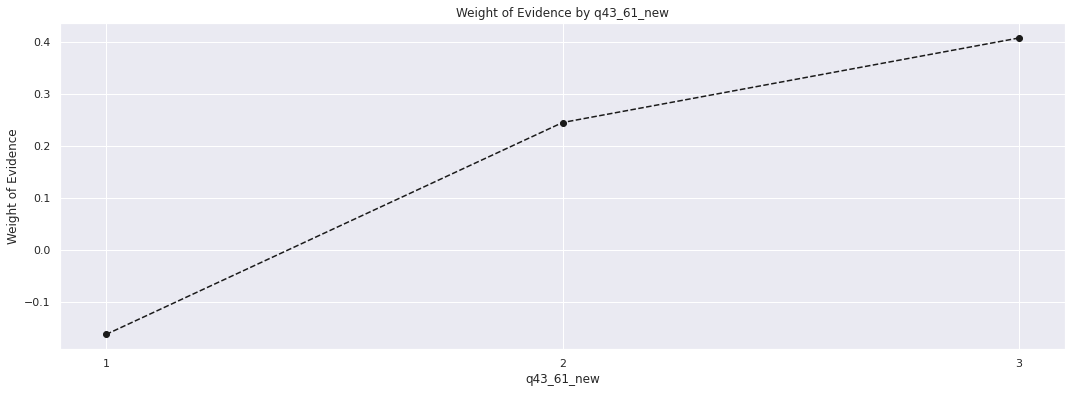

In [42]:
# create a new column filled with nan values
X_train_with_missing['q43_61_new'] = None
col_list = X_train_with_missing.filter(like='q43_').columns.tolist()+X_train_with_missing.filter(like='q61_').columns.tolist()
print(col_list)
for i in col_list:
    X_train_with_missing.loc[(X_train_with_missing[i]==1),'q43_61_new'] = 1
    X_train_with_missing.loc[(X_train_with_missing[i]==2),'q43_61_new'] = 2
    X_train_with_missing.loc[(X_train_with_missing[i]==3),'q43_61_new'] = 3
print(X_train_with_missing['q43_61_new'].value_counts())
print(woe_discrete(X_train_with_missing, 'q43_61_new', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q43_61_new', y_train))

['q75_1', 'q75_2', 'q75_3']
   q75_1  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      1     46   0.739130    0.024705    34.0   12.0     0.020706   
1      0   1816   0.885463    0.975295  1608.0  208.0     0.979294   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.054545 -0.968589             NaN       NaN  0.033966  
1    0.945455  0.035166        0.146332  1.003754  0.033966  
   q75_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      1     55   0.800000    0.029538    44.0   11.0     0.026797   
1      0   1807   0.884339    0.970462  1598.0  209.0     0.973203   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0        0.05 -0.623748             NaN       NaN  0.015033  
1        0.95  0.024131        0.084339   0.64788  0.015033  
   q75_3  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      0     98   0.785714    0.052632    77.0   21.0     0.046894   
1      1   1764   0.887188    0.947368

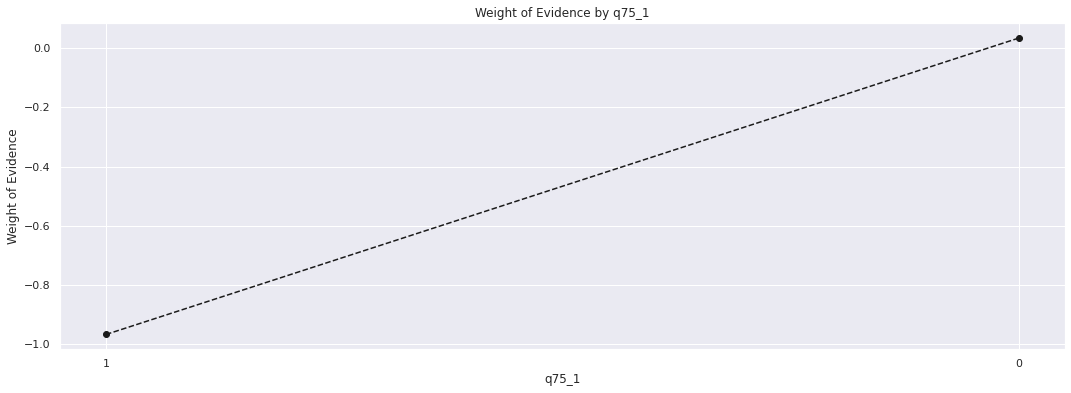

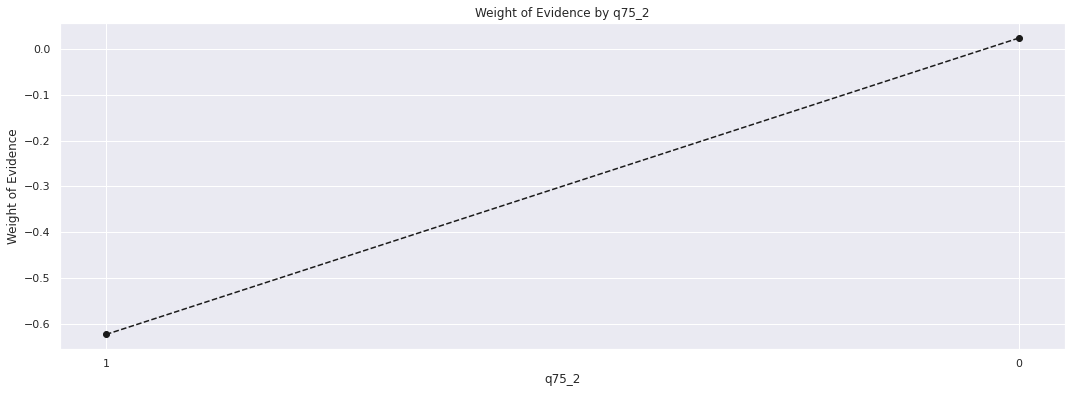

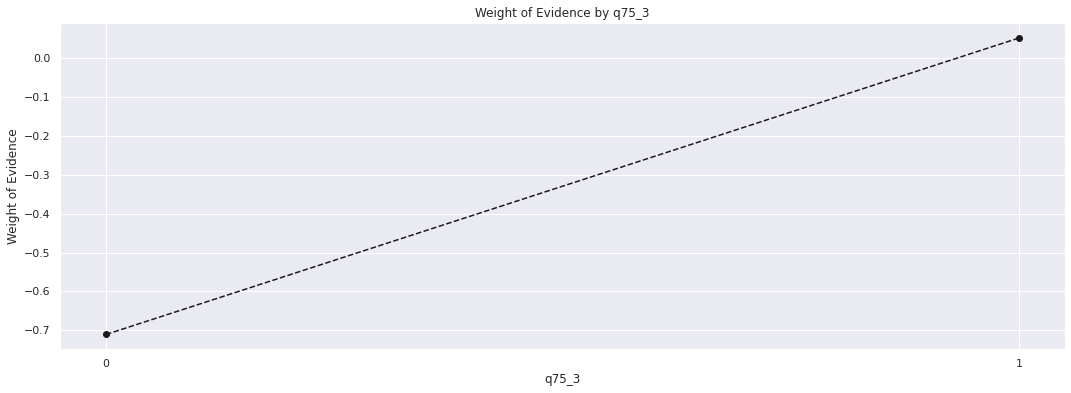

In [43]:
# create a new column filled with nan values
col_list = X_train_with_missing.filter(like='q75_').columns.tolist()
print(col_list)

for i in col_list:
    print(woe_discrete(X_train_with_missing, i, y_train))
    plot_by_woe(woe_discrete(X_train_with_missing, i, y_train))
    

   q78  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0    1    264   0.560606    0.141783   148.0  116.0     0.090134    0.527273   
1    2   1598   0.934919    0.858217  1494.0  104.0     0.909866    0.472727   

        WoE  diff_prop_good  diff_WoE      IV  
0 -1.766421             NaN       NaN  1.0584  
1  0.654779        0.374313  2.421199  1.0584  


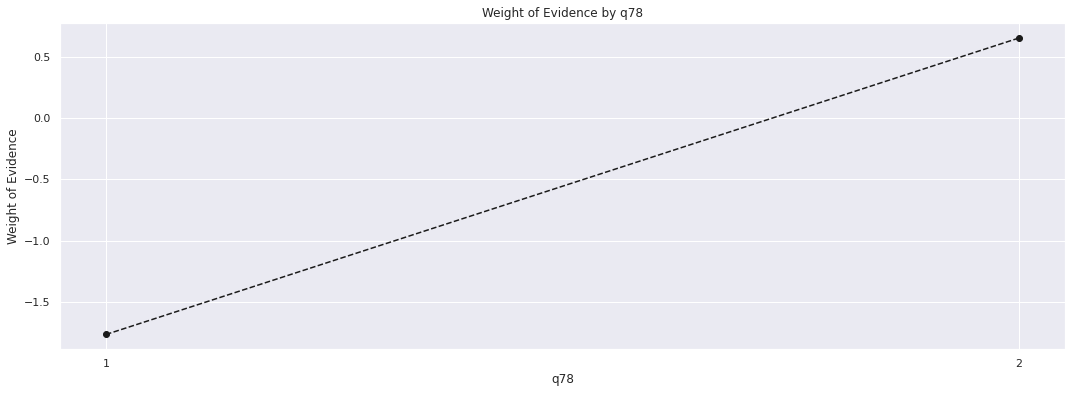

In [44]:
print(woe_discrete(X_train_with_missing, 'q78', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q78', y_train))

   q78b  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   1.0    185   0.497297    0.700758    92.0   93.0     0.621622    0.801724   
1   2.0     79   0.708861    0.299242    56.0   23.0     0.378378    0.198276   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.254433             NaN       NaN  0.162213  
1  0.646235        0.211563  0.900668  0.162213  


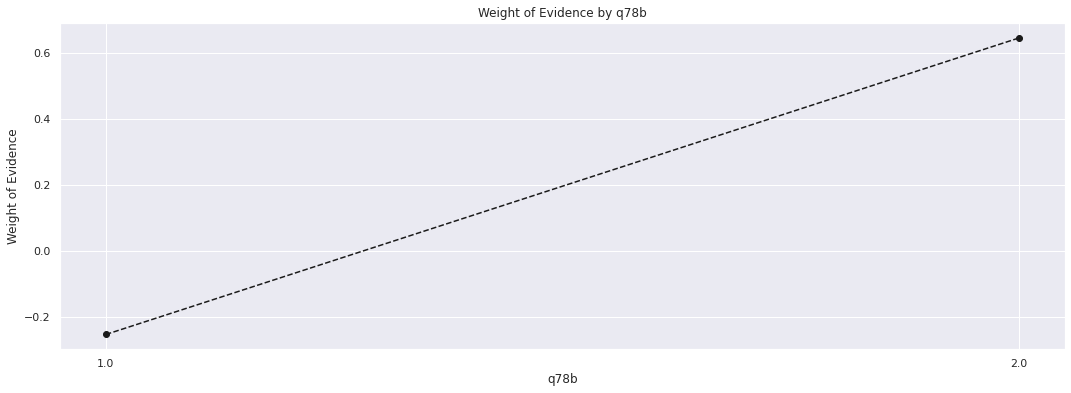

In [45]:
print(woe_discrete(X_train_with_missing, 'q78b', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q78b', y_train))

['q78c_1', 'q78c_2', 'q78c_3', 'q78c_4', 'q78c_5', 'q78c_6']
   q78c_1  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0     0.0    641   0.907956    0.849007   582.0   59.0     0.848397   
1     1.0    114   0.912281    0.150993   104.0   10.0     0.151603   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.855072 -0.007838             NaN       NaN  0.000353  
1    0.144928  0.045035        0.004324  0.052873  0.000353  
   q78c_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0     0.0    437   0.906178    0.578808   396.0   41.0     0.577259   
1     1.0    318   0.911950    0.421192   290.0   28.0     0.422741   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.594203 -0.028929             NaN       NaN  0.001183  
1    0.405797  0.040905        0.005771  0.069834  0.001183  
   q78c_3  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0     1.0    221   0.882353    0.292715   195.0   26.0     0.284257 

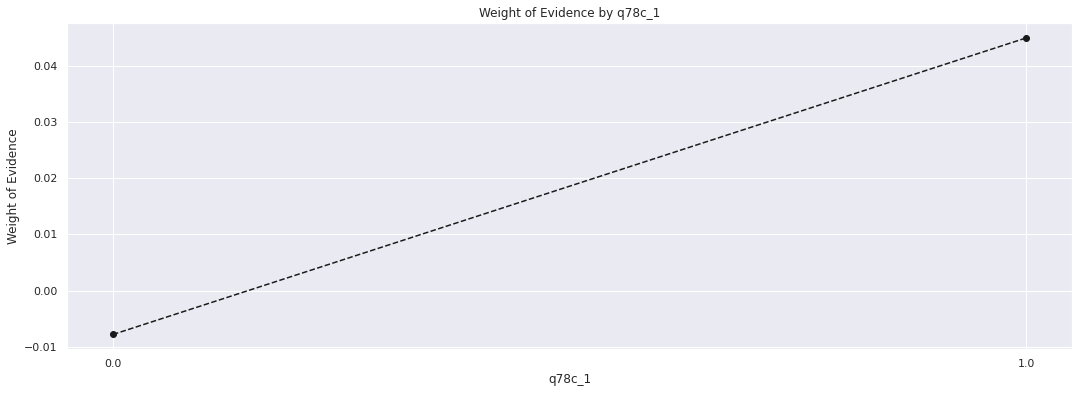

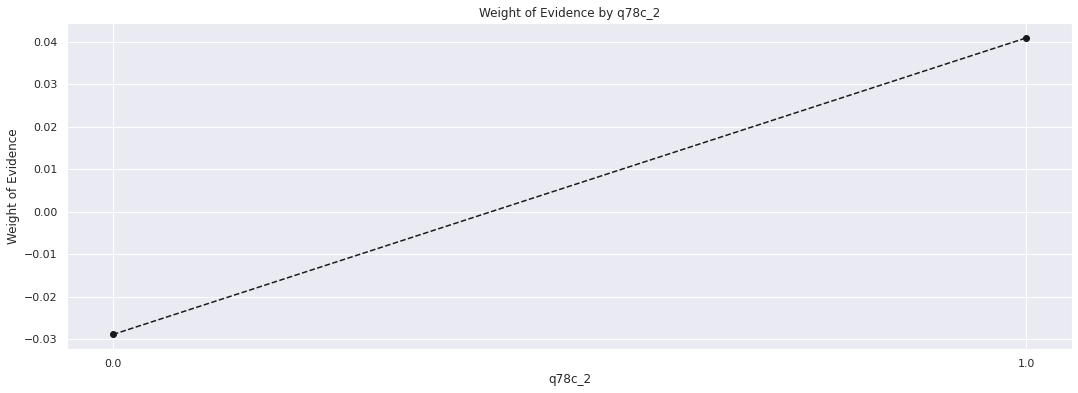

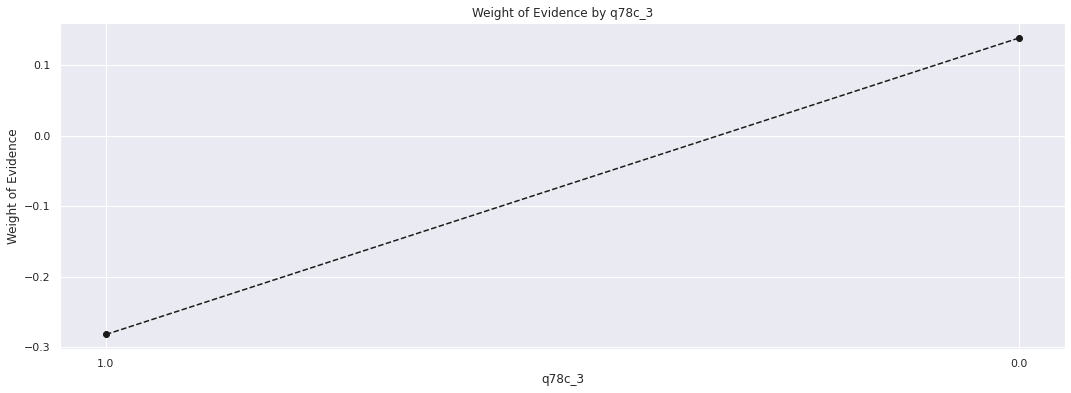

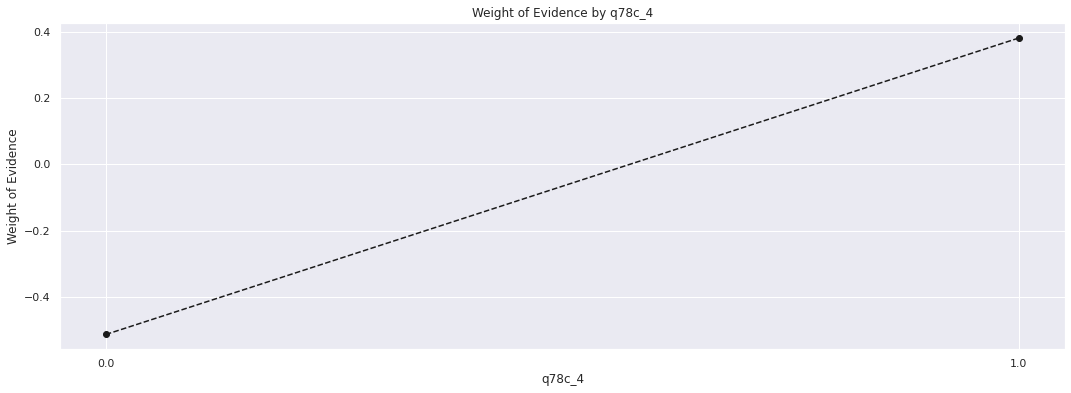

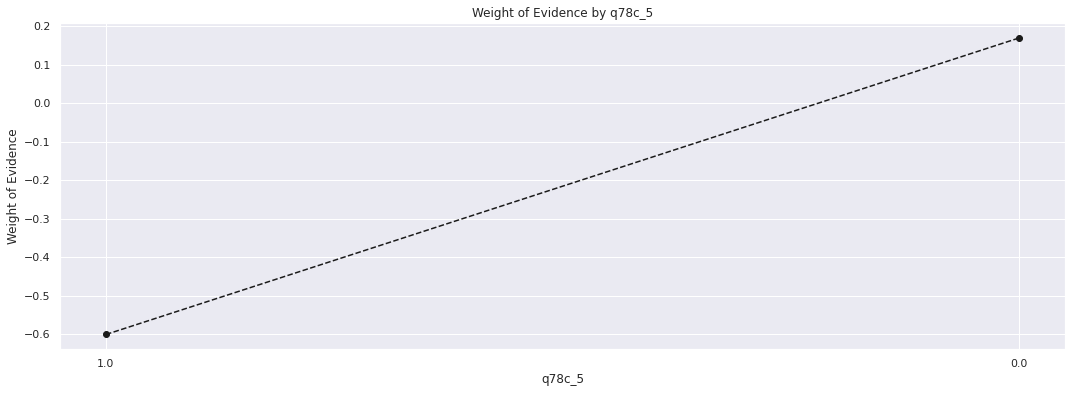

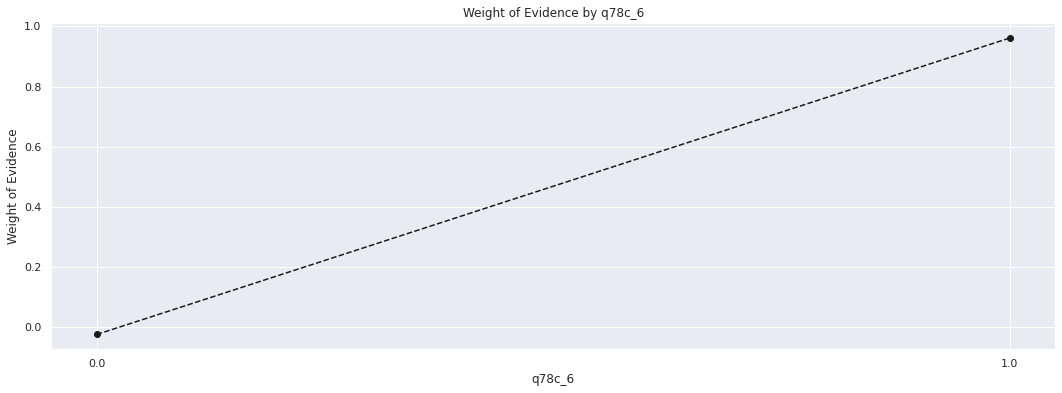

In [46]:
# create a new column filled with nan values
col_list = X_train_with_missing.filter(like='q78c_').columns.tolist()
print(col_list)

for i in col_list:
    print(woe_discrete(X_train_with_missing, i, y_train))
    plot_by_woe(woe_discrete(X_train_with_missing, i, y_train))

   q81  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0  1.0     51   0.725490    0.030375    37.0   14.0     0.024749    0.076087   
1  5.0    419   0.871122    0.249553   365.0   54.0     0.244147    0.293478   
2  2.0    224   0.875000    0.133413   196.0   28.0     0.131104    0.152174   
3  4.0    493   0.908722    0.293627   448.0   45.0     0.299666    0.244565   
4  3.0    492   0.912602    0.293032   449.0   43.0     0.300334    0.233696   

        WoE  diff_prop_good  diff_WoE        IV  
0 -1.123085             NaN       NaN  0.097789  
1 -0.184032        0.145632  0.939053  0.097789  
2 -0.149036        0.003878  0.034997  0.097789  
3  0.203185        0.033722  0.352221  0.097789  
4  0.250877        0.003880  0.047692  0.097789  


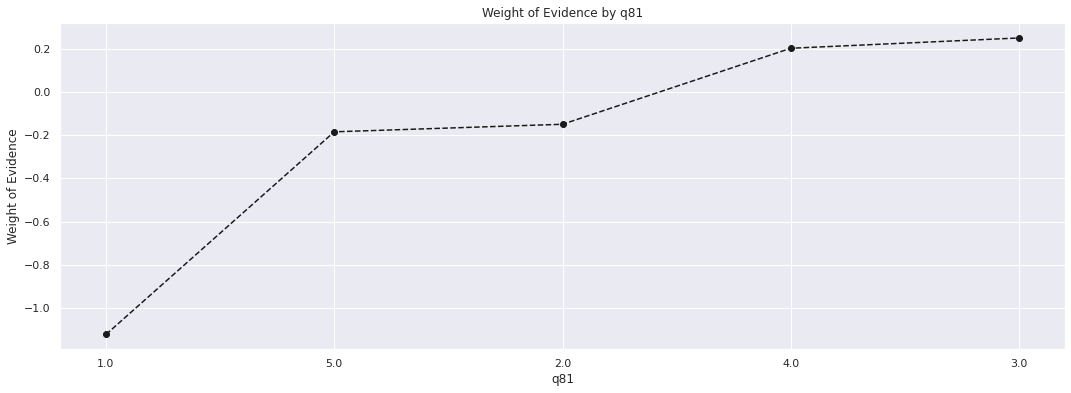

In [47]:
print(woe_discrete(X_train_with_missing, 'q81', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q81', y_train))

   q81x  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   1.0    275   0.847273    0.161385   233.0   42.0     0.153390    0.227027   
1   4.0    419   0.871122    0.245892   365.0   54.0     0.240290    0.291892   
2   6.0      8   0.875000    0.004695     7.0    1.0     0.004608    0.005405   
3   3.0    493   0.908722    0.289319   448.0   45.0     0.294931    0.243243   
4   2.0    492   0.912602    0.288732   449.0   43.0     0.295589    0.232432   
5   5.0     17   1.000000    0.009977    17.0    0.0     0.011192    0.000000   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.392083             NaN       NaN  inf  
1 -0.194538        0.023849  0.197544  inf  
2 -0.159542        0.003878  0.034997  inf  
3  0.192679        0.033722  0.352221  inf  
4  0.240371        0.003880  0.047692  inf  
5       inf        0.087398       inf  inf  


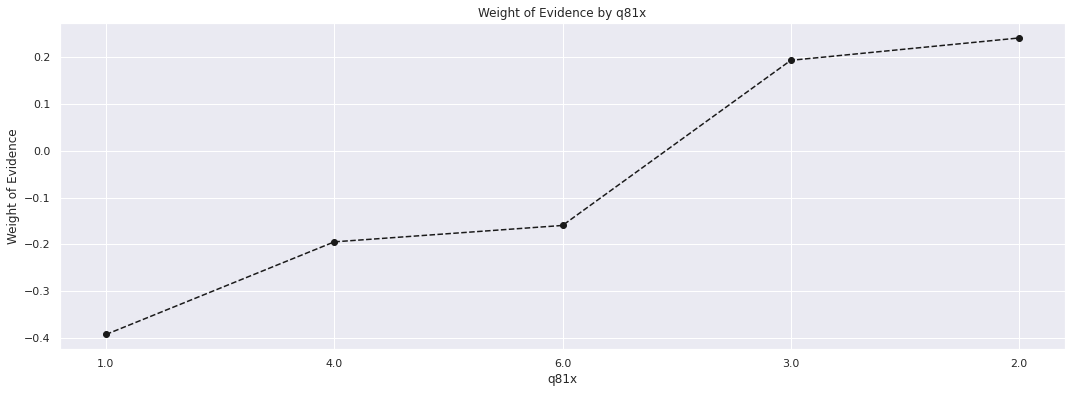

In [48]:
print(woe_discrete(X_train_with_missing, 'q81x', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q81x', y_train))

['q84_1', 'q84_2', 'q84_3', 'q84_4', 'q84_5', 'q84_6', 'q84_7', 'q84_8', 'q84_9', 'q84_10', 'q84_11', 'q84_12', 'q84_13', 'q84_14', 'q84_15', 'q84_16', 'q84_17', 'q84_18']
   q84_1  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      1    865   0.875145    0.464554   757.0  108.0     0.461023   
1      0    997   0.887663    0.535446   885.0  112.0     0.538977   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.490909 -0.062811             NaN       NaN  0.003582  
1    0.509091  0.057046        0.012518  0.119857  0.003582  
   q84_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      1    295   0.881356    0.158432   260.0   35.0     0.158343   
1      0   1567   0.881940    0.841568  1382.0  185.0     0.841657   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.159091 -0.004709             NaN       NaN  0.000004  
1    0.840909  0.000888        0.000584  0.005598  0.000004  
   q84_3  n_obs  prop_good  prop_n

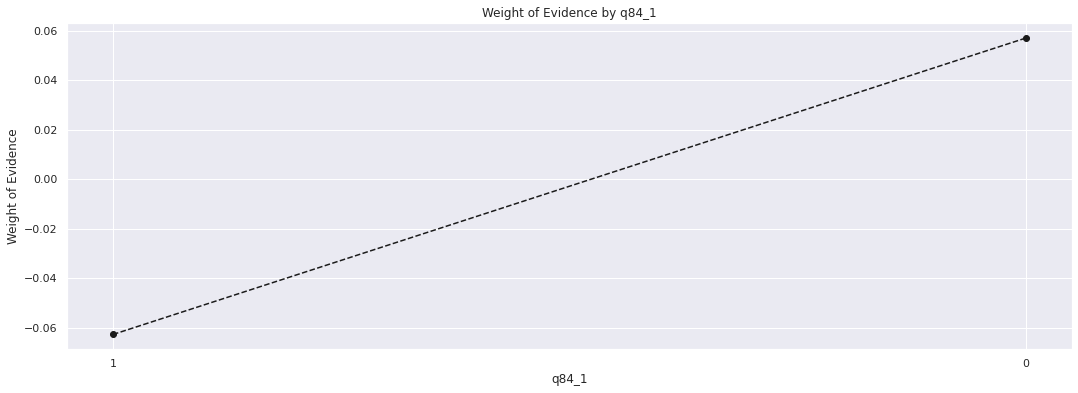

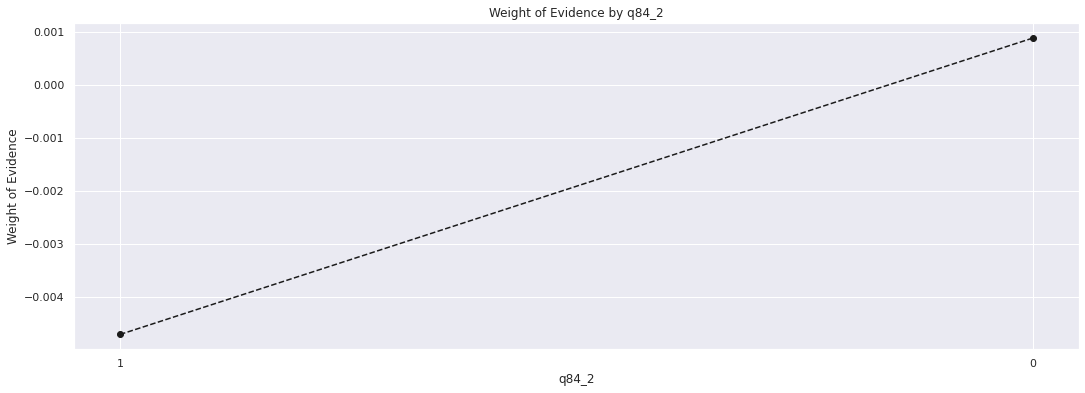

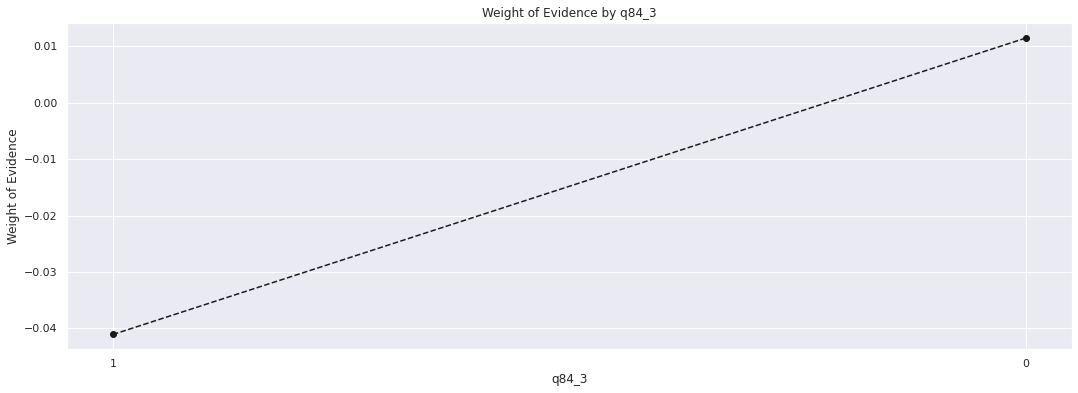

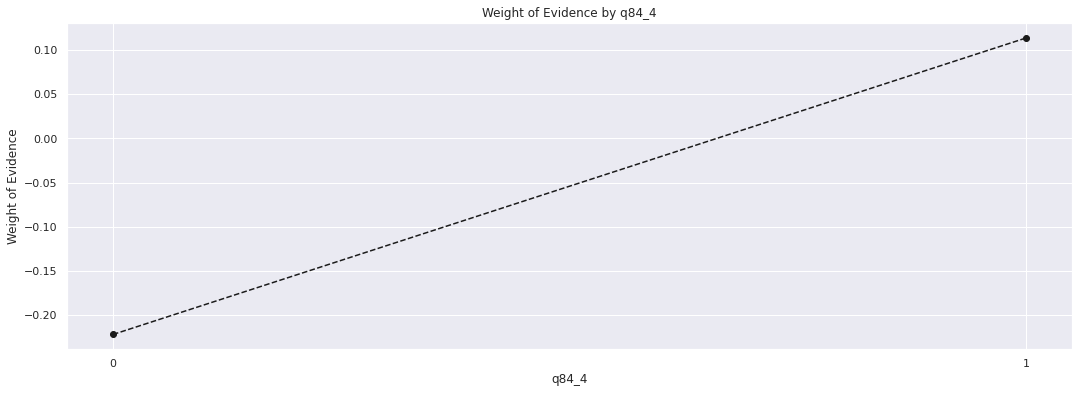

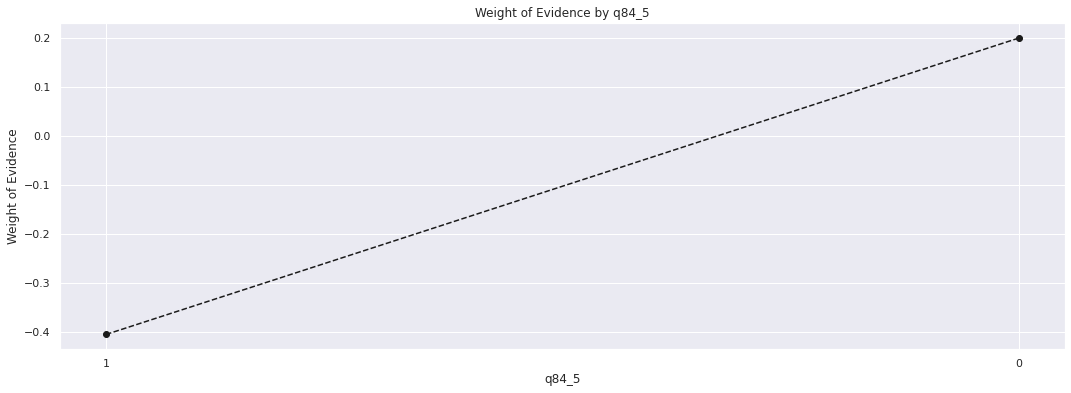

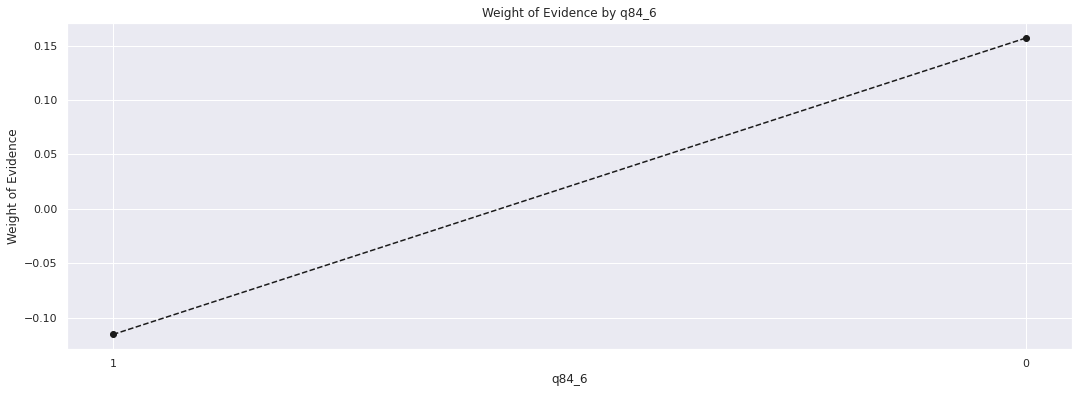

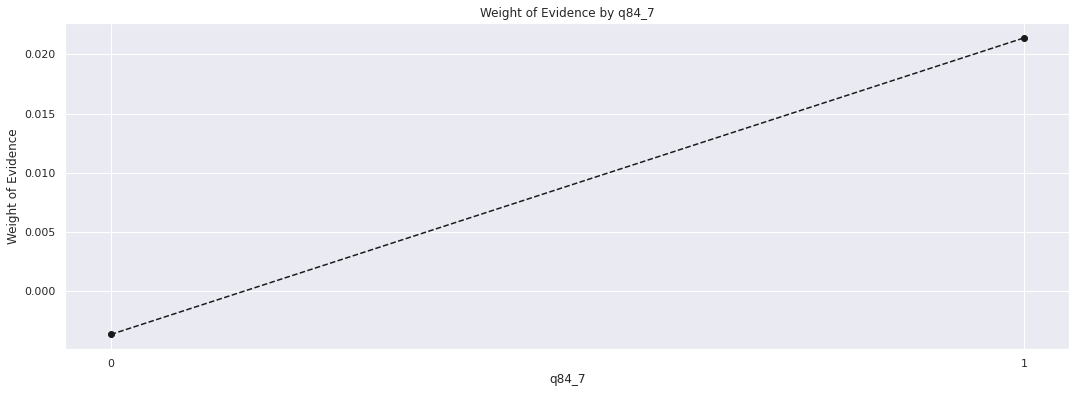

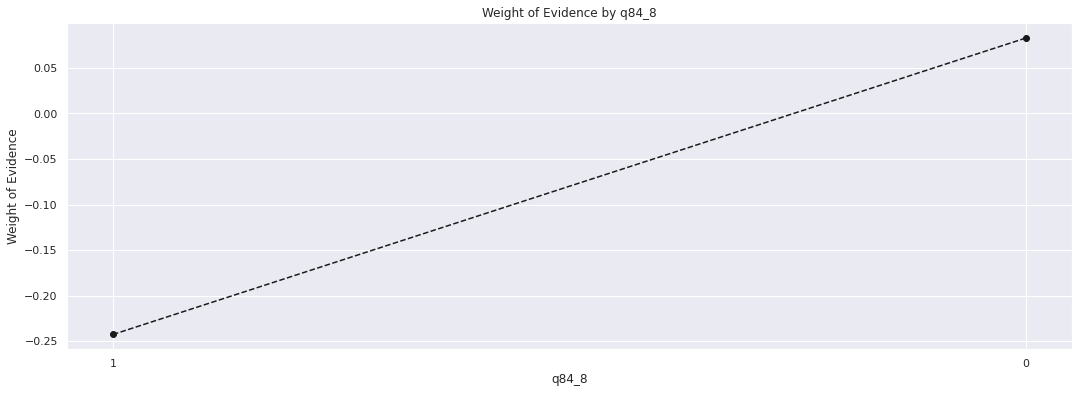

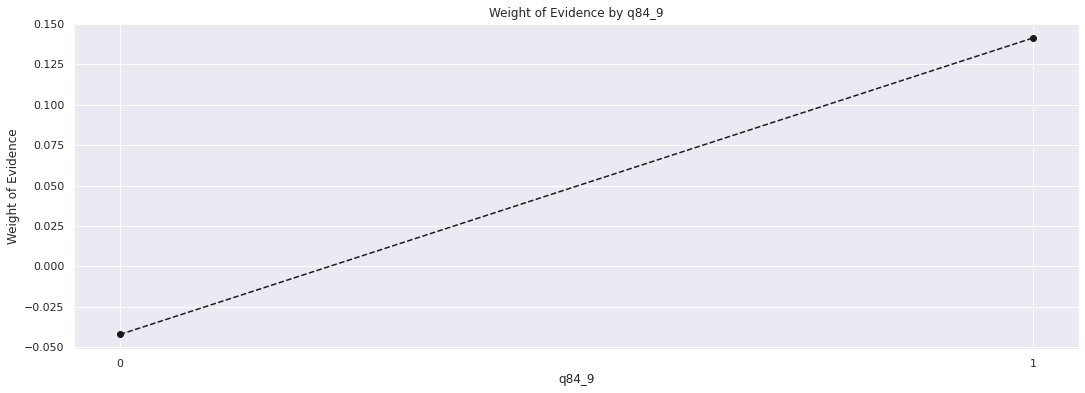

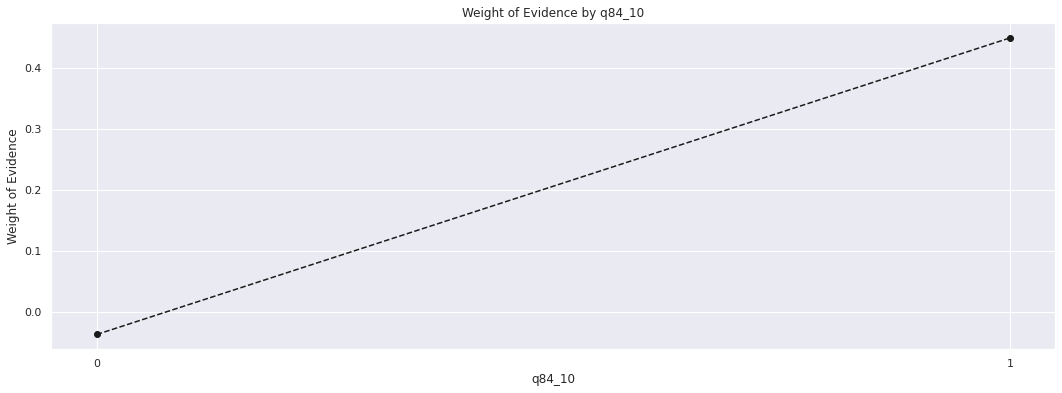

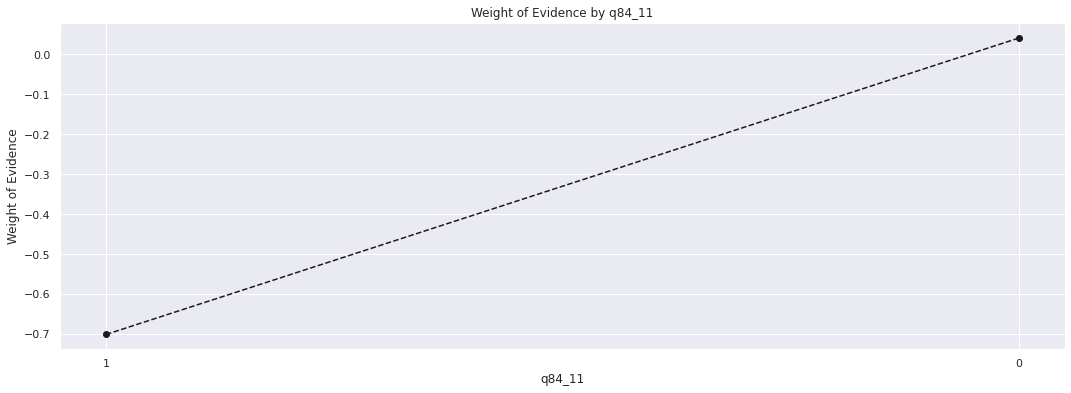

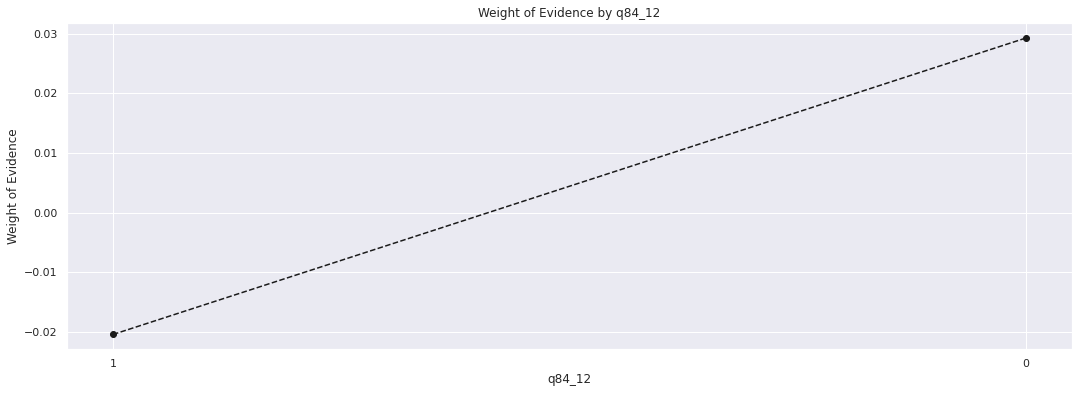

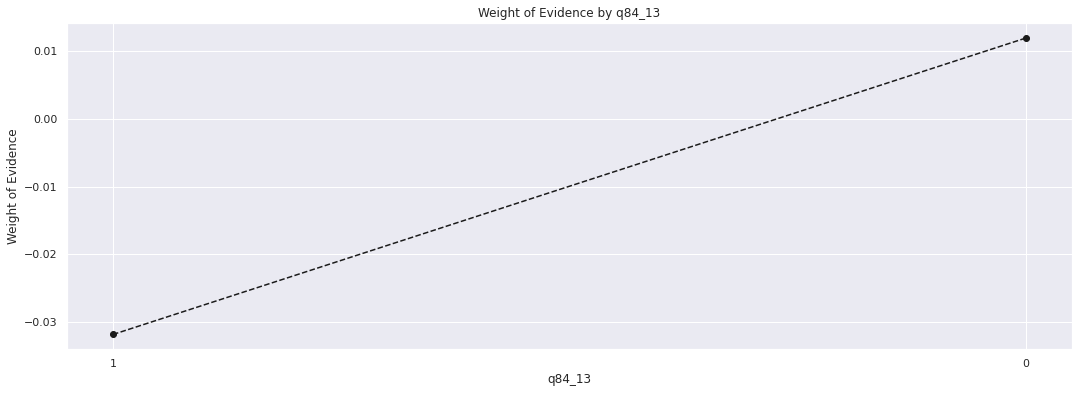

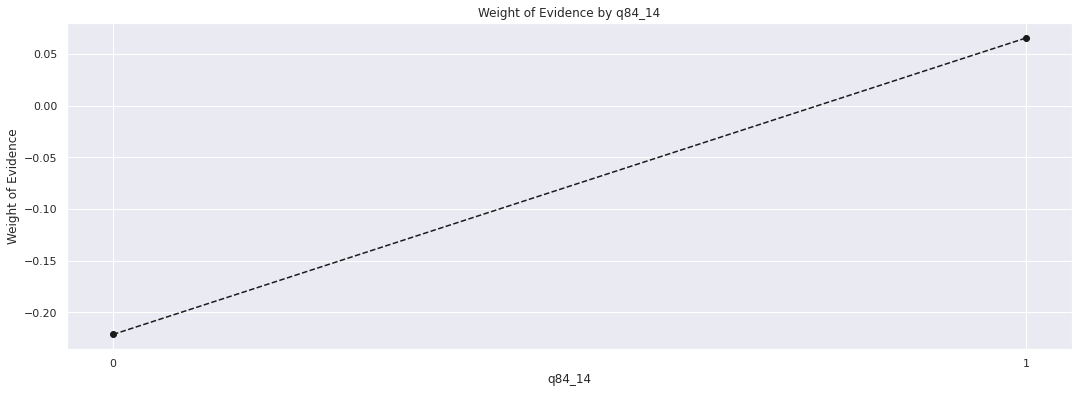

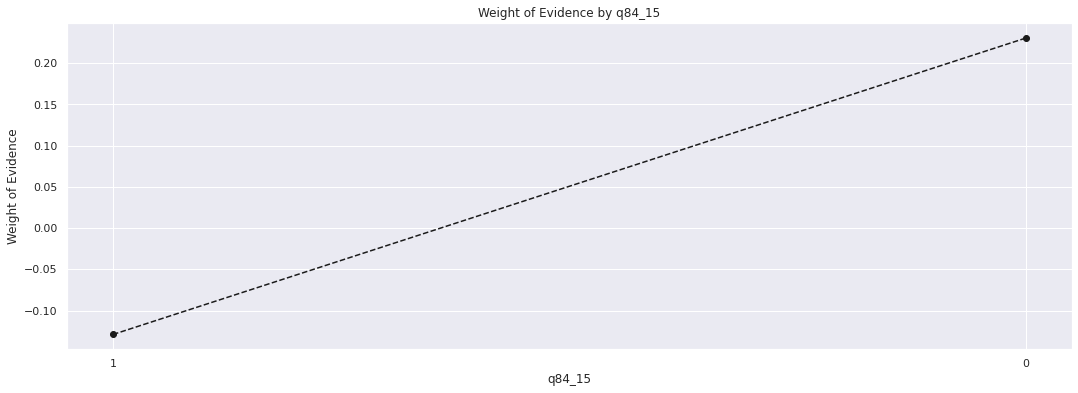

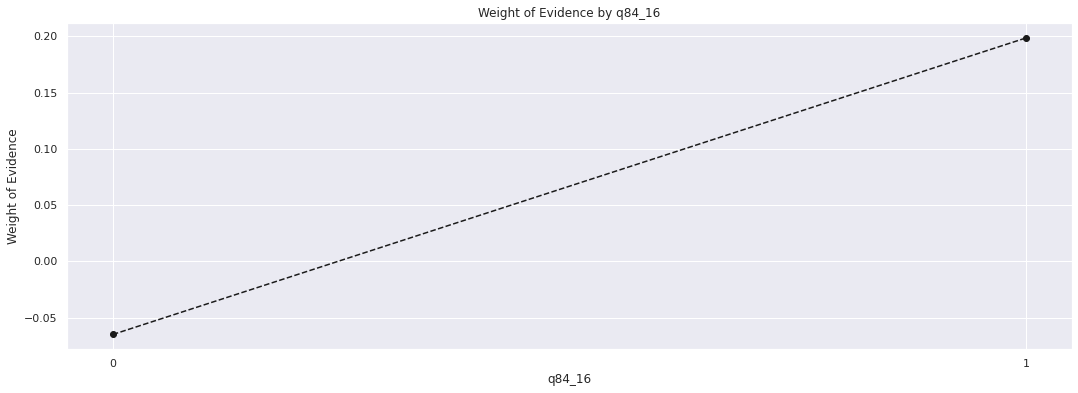

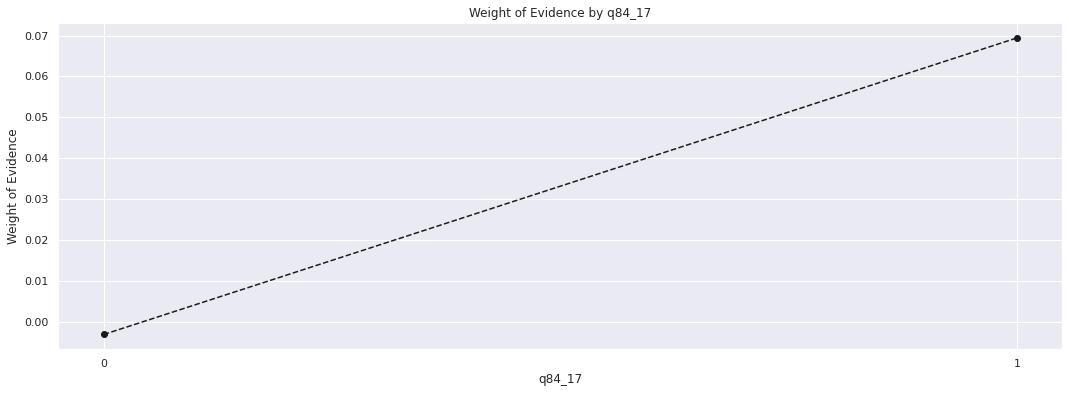

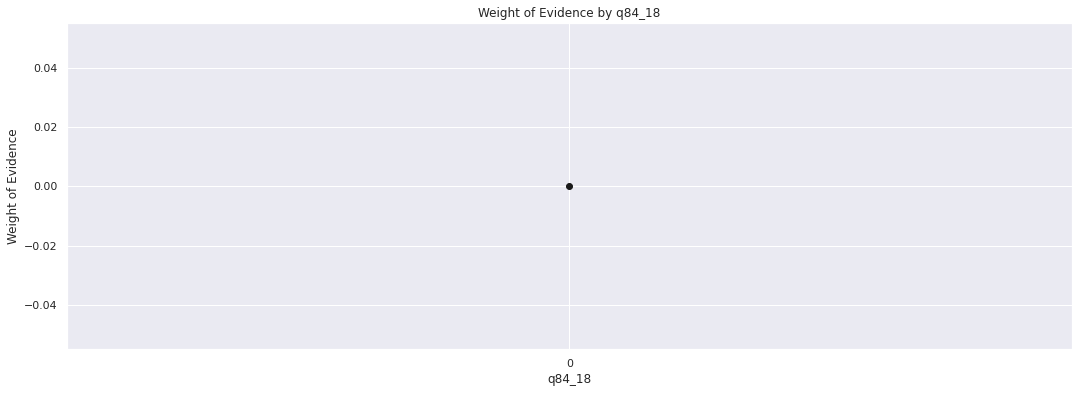

In [49]:
# create a new column filled with nan values
col_list = X_train_with_missing.filter(like='q84_').columns.tolist()
print(col_list)

for i in col_list:
    print(woe_discrete(X_train_with_missing, i, y_train))
    plot_by_woe(woe_discrete(X_train_with_missing, i, y_train))

   q85  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0  4.0     16   0.875000       0.080    14.0    2.0     0.079096    0.086957   
1  1.0    116   0.879310       0.580   102.0   14.0     0.576271    0.608696   
2  3.0     18   0.888889       0.090    16.0    2.0     0.090395    0.086957   
3  2.0     39   0.897436       0.195    35.0    4.0     0.197740    0.173913   
4  5.0     11   0.909091       0.055    10.0    1.0     0.056497    0.043478   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.094745             NaN       NaN  0.009122  
1 -0.054740        0.004310  0.040005  0.009122  
2  0.038786        0.009579  0.093526  0.009122  
3  0.128398        0.008547  0.089612  0.009122  
4  0.261930        0.011655  0.133531  0.009122  


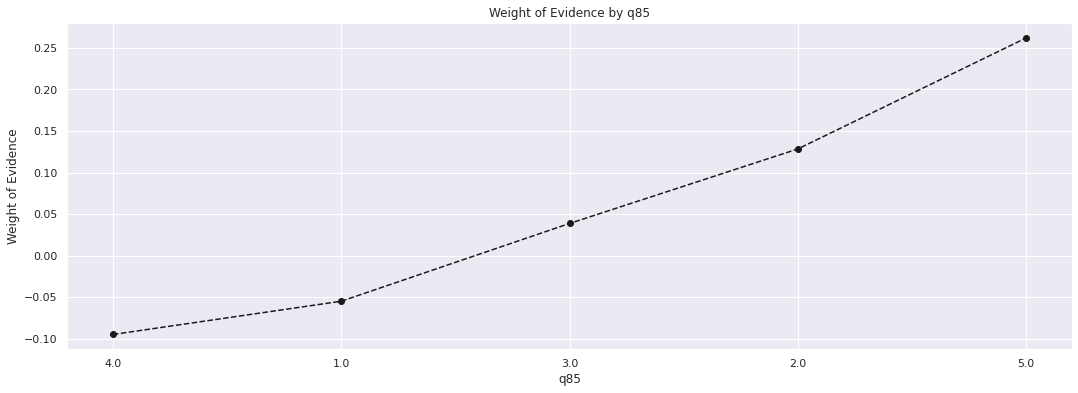

In [50]:
print(woe_discrete(X_train_with_missing, 'q85', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q85', y_train))

   q103106  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        5    249   0.550201    0.133727   137.0  112.0     0.083435   
1        4    215   0.813953    0.115467   175.0   40.0     0.106577   
2        3    373   0.892761    0.200322   333.0   40.0     0.202801   
3        2    572   0.970280    0.307197   555.0   17.0     0.338002   
4        1    453   0.975717    0.243287   442.0   11.0     0.269184   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.509091 -1.808561             NaN       NaN  1.566036  
1    0.181818 -0.534136        0.263753  1.274424  1.566036  
2    0.181818  0.109220        0.078808  0.643357  1.566036  
3    0.077273  1.475712        0.077518  1.366492  1.566036  
4    0.050000  1.683372        0.005438  0.207660  1.566036  


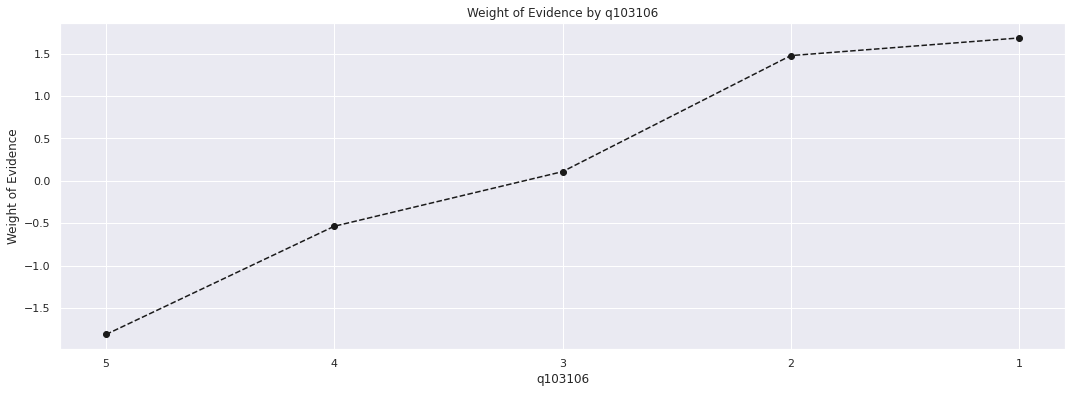

In [51]:
print(woe_discrete(X_train_with_missing, 'q103106', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q103106', y_train))

   q111112  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      2.0     11   0.727273    0.009426     8.0    3.0     0.007874   
1      1.0     51   0.784314    0.043702    40.0   11.0     0.039370   
2      3.0    189   0.820106    0.161954   155.0   34.0     0.152559   
3      5.0    460   0.871739    0.394173   401.0   59.0     0.394685   
4      4.0    456   0.903509    0.390746   412.0   44.0     0.405512   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.019868 -0.925520             NaN       NaN  0.097721  
1    0.072848 -0.615365        0.057041  0.310155  0.097721  
2    0.225166 -0.389284        0.035792  0.226080  0.097721  
3    0.390728  0.010075        0.051633  0.399359  0.097721  
4    0.291391  0.330485        0.031770  0.320410  0.097721  


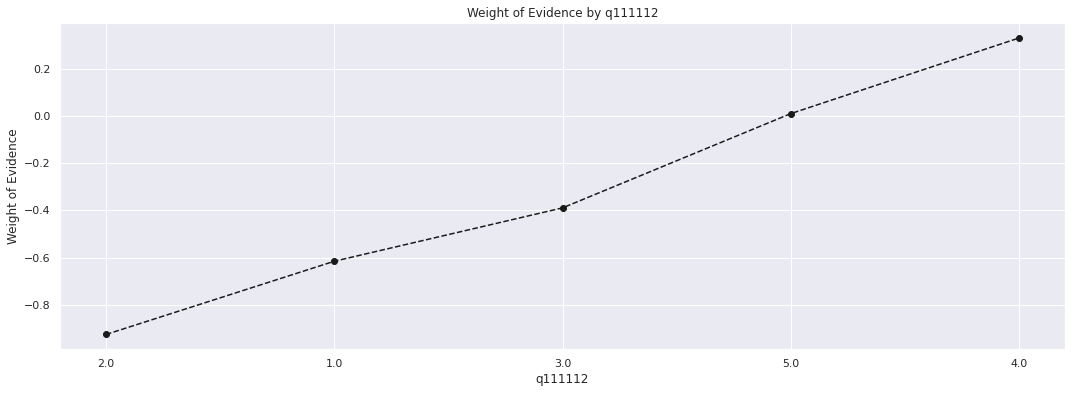

In [52]:
print(woe_discrete(X_train_with_missing, 'q111112', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q111112', y_train))

   q113  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   4.0     33   0.787879    0.040541    26.0    7.0     0.036161    0.073684   
1   5.0    357   0.882353    0.438575   315.0   42.0     0.438108    0.442105   
2   2.0    158   0.886076    0.194103   140.0   18.0     0.194715    0.189474   
3   3.0    218   0.894495    0.267813   195.0   23.0     0.271210    0.242105   
4   1.0     48   0.895833    0.058968    43.0    5.0     0.059805    0.052632   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.711798             NaN       NaN  0.031109  
1 -0.009081        0.094474  0.702717  0.031109  
2  0.027286        0.003723  0.036368  0.031109  
3  0.113521        0.008419  0.086235  0.031109  
4  0.127778        0.001338  0.014257  0.031109  


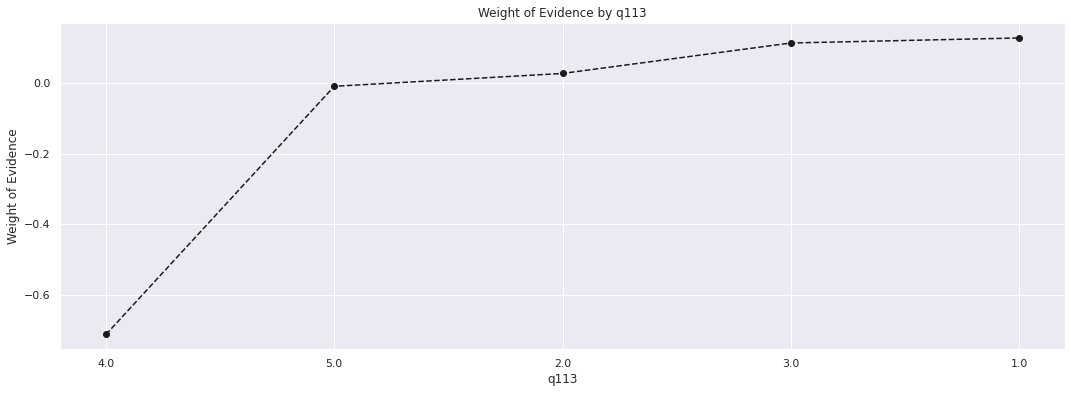

In [53]:
print(woe_discrete(X_train_with_missing, 'q113', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q113', y_train))

   qbb2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   4.0     32   0.187500    0.082902     6.0   26.0     0.017391    0.634146   
1   7.0     10   0.800000    0.025907     8.0    2.0     0.023188    0.048780   
2   5.0     21   0.904762    0.054404    19.0    2.0     0.055072    0.048780   
3   1.0    312   0.964744    0.808290   301.0   11.0     0.872464    0.268293   
4   2.0      2   1.000000    0.005181     2.0    0.0     0.005797    0.000000   
5   3.0      3   1.000000    0.007772     3.0    0.0     0.008696    0.000000   
6   6.0      6   1.000000    0.015544     6.0    0.0     0.017391    0.000000   

        WoE  diff_prop_good  diff_WoE   IV  
0 -3.596309             NaN       NaN  inf  
1 -0.743678        0.612500  2.852631  inf  
2  0.121319        0.104762  0.864997  inf  
3  1.179243        0.059982  1.057923  inf  
4       inf        0.035256       inf  inf  
5       inf        0.000000       NaN  inf  
6       inf        0.000000       Na

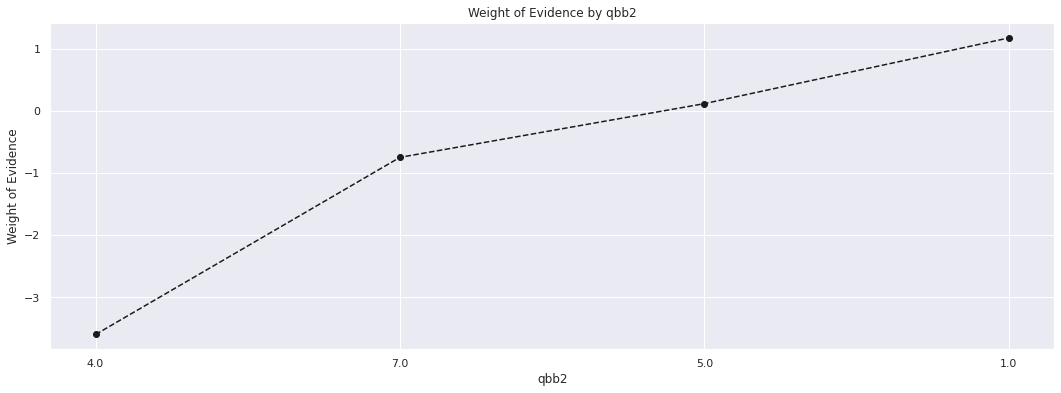

In [54]:
print(woe_discrete(X_train_with_missing, 'qbb2', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'qbb2', y_train))

   qbb3  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   5.0      4   0.250000       0.100     1.0    3.0     0.028571         0.6   
1   4.0      4   0.750000       0.100     3.0    1.0     0.085714         0.2   
2   1.0     26   0.961538       0.650    25.0    1.0     0.714286         0.2   
3   2.0      2   1.000000       0.050     2.0    0.0     0.057143         0.0   
4   3.0      1   1.000000       0.025     1.0    0.0     0.028571         0.0   
5   6.0      3   1.000000       0.075     3.0    0.0     0.085714         0.0   

        WoE  diff_prop_good  diff_WoE   IV  
0 -3.044522             NaN       NaN  inf  
1 -0.847298        0.500000  2.197225  inf  
2  1.272966        0.211538  2.120264  inf  
3       inf        0.038462       inf  inf  
4       inf        0.000000       NaN  inf  
5       inf        0.000000       NaN  inf  


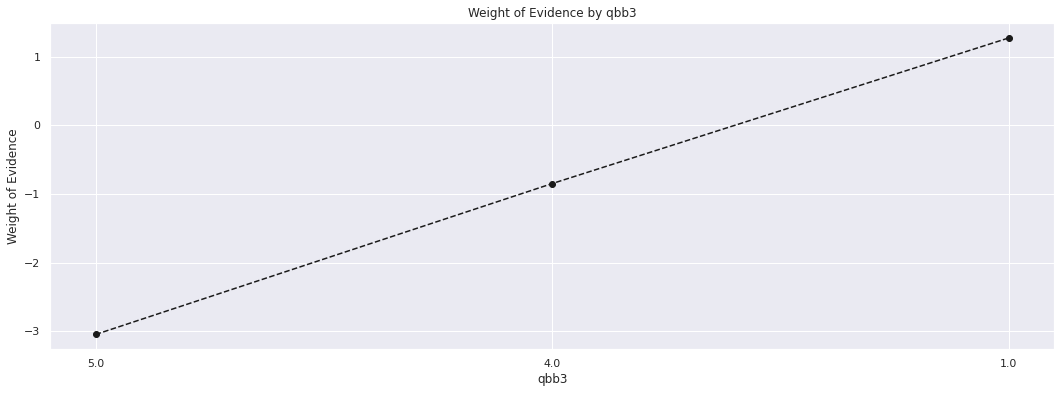

In [55]:
print(woe_discrete(X_train_with_missing, 'qbb3', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'qbb3', y_train))

 3.0    366
 4.0    253
 2.0    236
 5.0    104
 1.0     90
 0.0     88
-2.0     75
-3.0     57
-1.0     40
-4.0     24
-5.0     10
Name: q115_116, dtype: int64
    q115_116  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0       -3.0     57   0.684211    0.042442    39.0   18.0     0.032995   
1       -4.0     24   0.791667    0.017870    19.0    5.0     0.016074   
2       -5.0     10   0.800000    0.007446     8.0    2.0     0.006768   
3       -1.0     40   0.800000    0.029784    32.0    8.0     0.027073   
4        0.0     88   0.806818    0.065525    71.0   17.0     0.060068   
5        1.0     90   0.811111    0.067014    73.0   17.0     0.061760   
6       -2.0     75   0.813333    0.055845    61.0   14.0     0.051607   
7        2.0    236   0.847458    0.175726   200.0   36.0     0.169205   
8        3.0    366   0.918033    0.272524   336.0   30.0     0.284264   
9        4.0    253   0.960474    0.188384   243.0   10.0     0.205584   
10       5.0    104   0.9

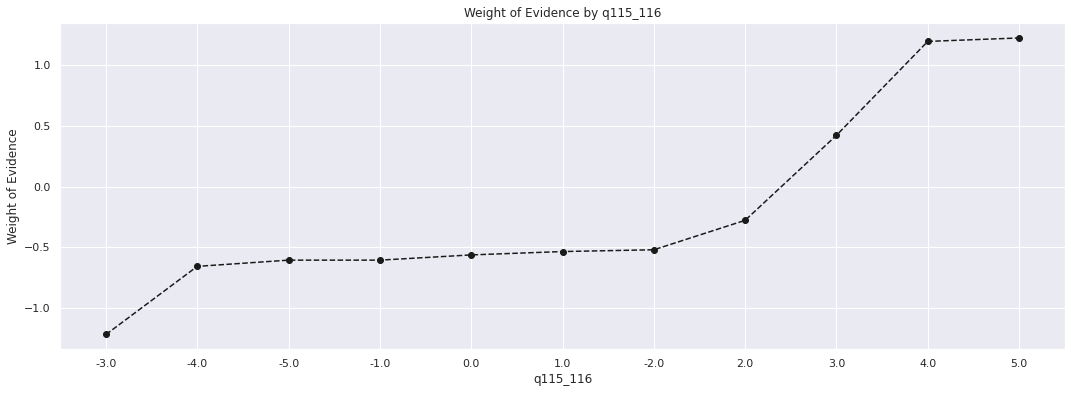

In [60]:
# create a new column filled with nan values
X_train_with_missing['q115_116'] = None
X_train_with_missing.loc[X_train_with_missing['q115'] == 3.00,'q115_116'] = 0.00
X_train_with_missing.loc[X_train_with_missing['q116_p'] == 1.00,'q115_116'] = 1.00
X_train_with_missing.loc[X_train_with_missing['q116_p'] == 2.00,'q115_116'] = 2.00
X_train_with_missing.loc[X_train_with_missing['q116_p'] == 3.00,'q115_116'] = 3.00
X_train_with_missing.loc[X_train_with_missing['q116_p'] == 4.00,'q115_116'] = 4.00
X_train_with_missing.loc[X_train_with_missing['q116_p'] == 5.00,'q115_116'] = 5.00
X_train_with_missing.loc[X_train_with_missing['q116_l'] == 1.00,'q115_116'] = -1.00
X_train_with_missing.loc[X_train_with_missing['q116_l'] == 2.00,'q115_116'] = -2.00
X_train_with_missing.loc[X_train_with_missing['q116_l'] == 3.00,'q115_116'] = -3.00
X_train_with_missing.loc[X_train_with_missing['q116_l'] == 4.00,'q115_116'] = -4.00
X_train_with_missing.loc[X_train_with_missing['q116_l'] == 5.00,'q115_116'] = -5.00

print(X_train_with_missing['q115_116'].value_counts())
print(woe_discrete(X_train_with_missing, 'q115_116', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q115_116', y_train))

   q117  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0   2.0    302   0.788079    0.243548   238.0   64.0     0.218951    0.418301   
1   1.0     57   0.824561    0.045968    47.0   10.0     0.043238    0.065359   
2   3.0    155   0.851613    0.125000   132.0   23.0     0.121435    0.150327   
3   4.0    182   0.873626    0.146774   159.0   23.0     0.146274    0.150327   
4   8.0     39   0.897436    0.031452    35.0    4.0     0.032199    0.026144   
5   6.0    138   0.927536    0.111290   128.0   10.0     0.117755    0.065359   
6   5.0    145   0.944828    0.116935   137.0    8.0     0.126035    0.052288   
7   9.0     40   0.950000    0.032258    38.0    2.0     0.034959    0.013072   
8   7.0    181   0.950276    0.145968   172.0    9.0     0.158234    0.058824   
9  10.0      1   1.000000    0.000806     1.0    0.0     0.000920    0.000000   

        WoE  diff_prop_good  diff_WoE   IV  
0 -0.647351             NaN       NaN  inf  
1 -0.413176       

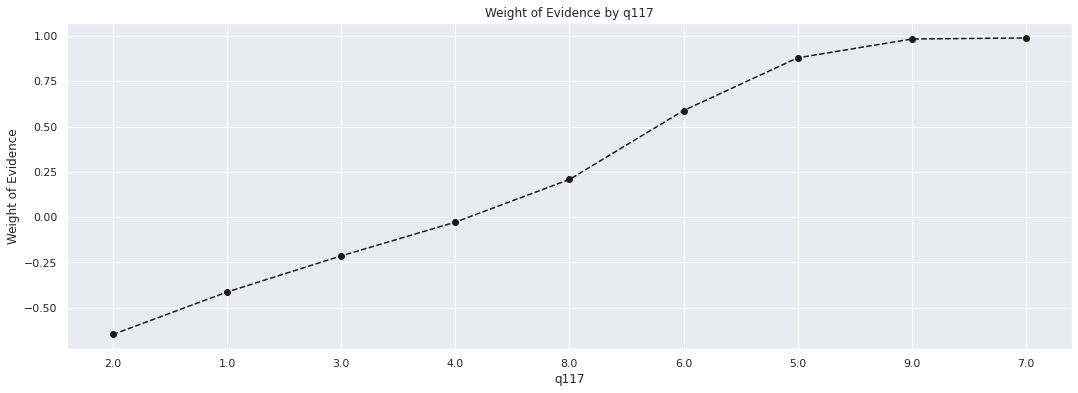

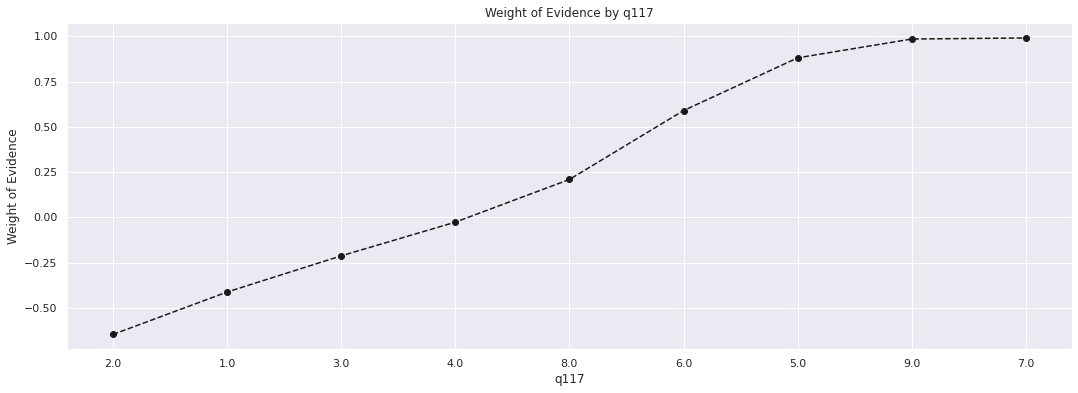

In [50]:
print(woe_discrete(X_train_with_missing, 'q117', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q117', y_train))

X_train_with_missing1=X_train_with_missing.copy()
X_train_with_missing1['q117'].replace(10, None, inplace=True)
print(woe_discrete(X_train_with_missing1, 'q117', y_train))
plot_by_woe(woe_discrete(X_train_with_missing1, 'q117', y_train))

    q119  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    1.0    237   0.797468    0.132107   189.0   48.0     0.119848   
1   11.0     13   0.846154    0.007246    11.0    2.0     0.006975   
2    2.0    144   0.868056    0.080268   125.0   19.0     0.079264   
3    5.0    133   0.872180    0.074136   116.0   17.0     0.073557   
4    6.0     95   0.884211    0.052954    84.0   11.0     0.053266   
5   15.0    359   0.888579    0.200111   319.0   40.0     0.202283   
6   13.0      9   0.888889    0.005017     8.0    1.0     0.005073   
7   14.0    458   0.893013    0.255295   409.0   49.0     0.259353   
8    7.0    116   0.896552    0.064660   104.0   12.0     0.065948   
9    4.0     62   0.903226    0.034560    56.0    6.0     0.035510   
10   3.0     44   0.909091    0.024526    40.0    4.0     0.025365   
11  12.0     11   0.909091    0.006132    10.0    1.0     0.006341   
12   8.0     87   0.919540    0.048495    80.0    7.0     0.050729   
13  10.0     26   1.

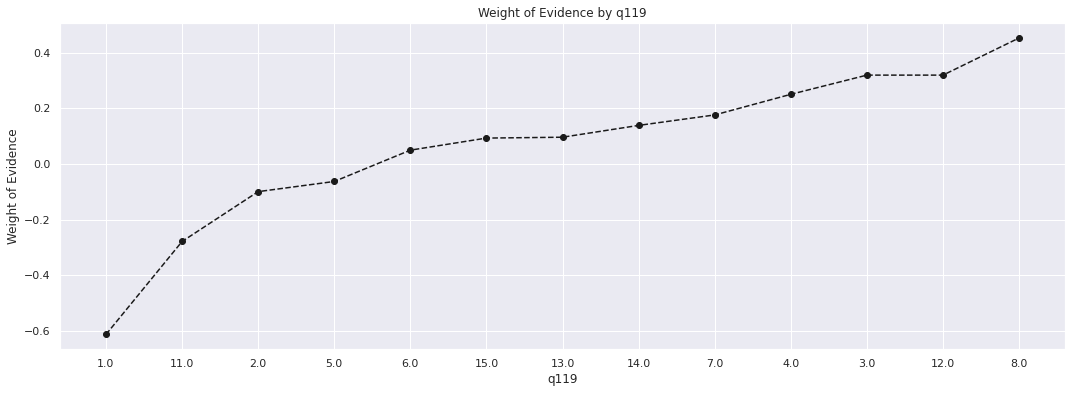

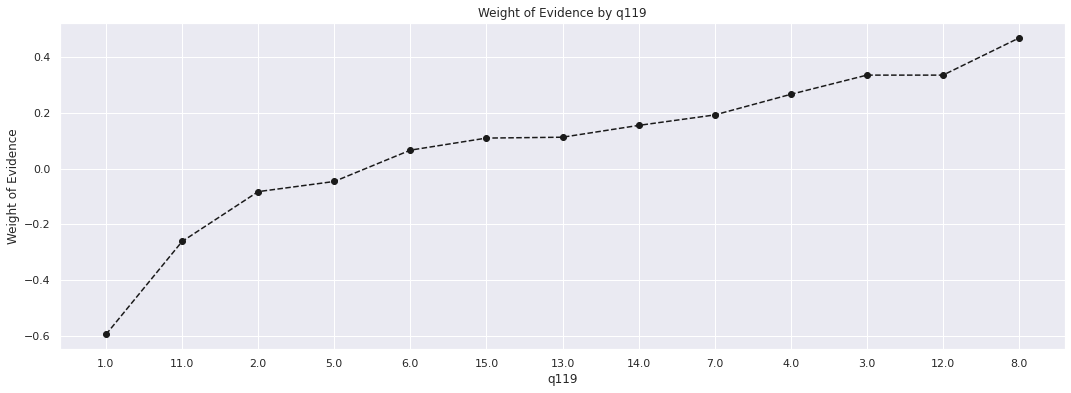

In [51]:
print(woe_discrete(X_train_with_missing, 'q119', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q119', y_train))

X_train_with_missing1=X_train_with_missing.copy()
X_train_with_missing1['q119'].replace(10, None, inplace=True)
print(woe_discrete(X_train_with_missing1, 'q119', y_train))
plot_by_woe(woe_discrete(X_train_with_missing1, 'q119', y_train))

    q120  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0      1    378   0.828042    0.203008   313.0   65.0     0.190621   
1     11      6   0.833333    0.003222     5.0    1.0     0.003045   
2     10     15   0.866667    0.008056    13.0    2.0     0.007917   
3      6     86   0.872093    0.046187    75.0   11.0     0.045676   
4      5    107   0.878505    0.057465    94.0   13.0     0.057247   
5     14    514   0.883268    0.276047   454.0   60.0     0.276492   
6     15    361   0.889197    0.193878   321.0   40.0     0.195493   
7      3     75   0.906667    0.040279    68.0    7.0     0.041413   
8      2    119   0.907563    0.063910   108.0   11.0     0.065773   
9      4     55   0.909091    0.029538    50.0    5.0     0.030451   
10     8     51   0.941176    0.027390    48.0    3.0     0.029233   
11     7     66   0.969697    0.035446    64.0    2.0     0.038977   
12     9     27   1.000000    0.014501    27.0    0.0     0.016443   
13    12      1   1.

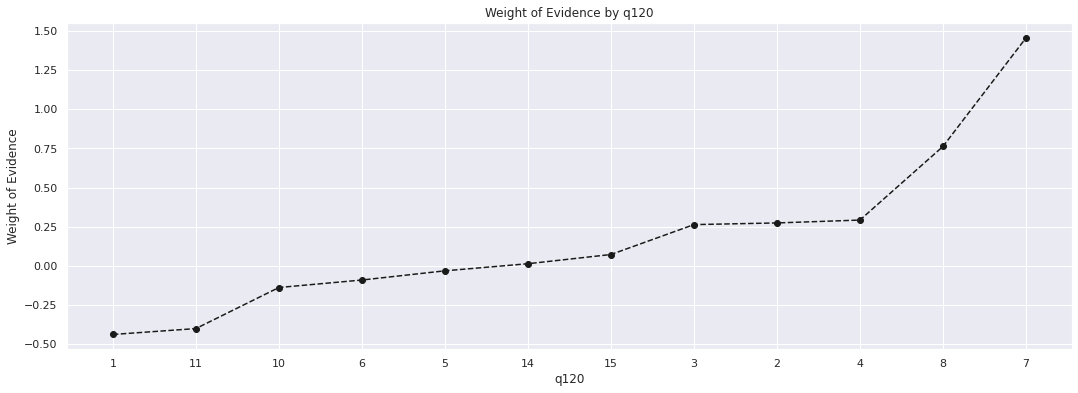

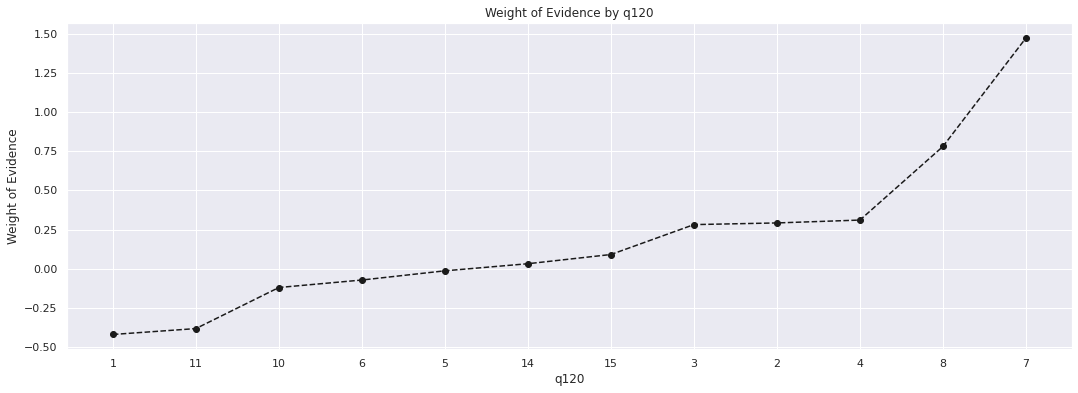

In [52]:
print(woe_discrete(X_train_with_missing, 'q120', y_train))
plot_by_woe(woe_discrete(X_train_with_missing, 'q120', y_train))

X_train_with_missing1=X_train_with_missing.copy()
X_train_with_missing1['q120'].replace([9,12,13], None, inplace=True)
print(woe_discrete(X_train_with_missing1, 'q120', y_train))
plot_by_woe(woe_discrete(X_train_with_missing1, 'q120', y_train))

In [58]:
print(X_train_with_missing['qbb2'].value_counts())
print(X_train_with_missing['qbb3'].value_counts())
print(X_train_with_missing['q75_3'].value_counts())


1.0    312
4.0     32
5.0     21
7.0     10
6.0      6
3.0      3
2.0      2
Name: qbb2, dtype: int64
1.0    26
4.0     4
5.0     4
6.0     3
2.0     2
3.0     1
Name: qbb3, dtype: int64
1    1764
0      98
Name: q75_3, dtype: int64


In [76]:
X_train_with_missing['q17_2'].value_counts()

1.0    107
0.0     51
Name: q17_2, dtype: int64

### one-hot coding for some variables  

In [5]:
#those variables without missing values 

df_final = pandas.get_dummies(df_final, columns=['risk'])

df_final = pandas.get_dummies(df_final, columns=['q126'])

df_final = pandas.get_dummies(df_final, columns=['q144'])

df_final = pandas.get_dummies(df_final, columns=['q7q8'])

df_final = pandas.get_dummies(df_final, columns=['q9'])

df_final = pandas.get_dummies(df_final, columns=['q11'])

df_final = pandas.get_dummies(df_final, columns=['q12'])

df_final = pandas.get_dummies(df_final, columns=['q13'])

df_final = pandas.get_dummies(df_final, columns=['q14y'])

df_final = pandas.get_dummies(df_final, columns=['q14ysu2'])

df_final = pandas.get_dummies(df_final, columns=['q15d2'])

df_final = pandas.get_dummies(df_final, columns=['q15z'])

df_final = pandas.get_dummies(df_final, columns=['q24a'])

df_final = pandas.get_dummies(df_final, columns=['q24b'])

df_final = pandas.get_dummies(df_final, columns=['q24c'])

df_final = pandas.get_dummies(df_final, columns=['q78'])

df_final = pandas.get_dummies(df_final, columns=['q103106'])

df_final = pandas.get_dummies(df_final, columns=['q120'])

In [6]:
#those variables with missing values but handled 
# df_final = df_final.drop(df_final[df_final['q15_1'] == -99.99].index)
# df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q15_').columns.tolist())

# df_final[df_final.filter(like='q35b').columns.tolist()+df_final.filter(like='q53').columns.tolist()].replace(-99.99,0.00,inplace=True)

df_temp  = df_final.copy()
cols = df_temp.filter(like='q35b').columns.tolist()+df_temp.filter(like='q53').columns.tolist()
df_final[cols] = df_temp[cols].replace(-99.99,0.00,inplace=False)



In [7]:
# for example, question 15 current external finance
print(df_final.filter(like='q15_').head(0))
print(df_final['q15_1'].value_counts())
# drop q15_1 where values equal to -99.99
df_final = df_final.drop(df_final[df_final['q15_1'] == -99.99].index)
print(df_final['q15_1'].value_counts())

Empty DataFrame
Columns: [q15_1, q15_2, q15_3, q15_4, q15_5, q15_6, q15_7, q15_8, q15_9, q15_10, q15_11, q15_12, q15_13, q15_14, q15_15, q15_16, q15_17, q15_18, q15_19, q15_20]
Index: []
 0.00     1195
 1.00     1128
-99.99       5
Name: q15_1, dtype: int64
0.0    1195
1.0    1128
Name: q15_1, dtype: int64


In [8]:
#those variables with missing values but not handled 
df_final = pandas.get_dummies(df_final, columns=['q11a'])

df_final = pandas.get_dummies(df_final, columns=['q13a'])

df_final = pandas.get_dummies(df_final, columns=['q13b'])

df_final = pandas.get_dummies(df_final, columns=['q14a'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q15b_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=['q15c'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q17_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q26_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=['q27'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q28_').columns.tolist())

df_temp  = df_final.copy()
cols = df_temp.filter(like='q38').columns.tolist()+df_temp.filter(like='q56').columns.tolist()
df_final[cols] = df_temp[cols].replace([-99.99, 3.00],0.00,inplace=False)

df_final['q38_56'] = -99.99
for i in cols:
    df_final.loc[df_final[i] == 1.00,'q38_56'] = 1.00
    df_final.loc[df_final[i] == 2.00,'q38_56'] = 2.00
    df_final.drop(i,axis=1,inplace=True)

df_final = pandas.get_dummies(df_final, columns=['q38_56'])

df_temp  = df_final.copy()
cols = df_temp.filter(like='q42').columns.tolist()+df_temp.filter(like='q60').columns.tolist()
df_final[cols] = df_temp[cols].replace([-99.99, 3.00],0.00,inplace=False)

df_final['q42_60'] = -99.99
for i in cols:
    df_final.loc[df_final[i] == 1.00,'q42_60'] = 1.00
    df_final.loc[df_final[i] == 2.00,'q42_60'] = 2.00
    df_final.drop(i,axis=1,inplace=True)

df_final = pandas.get_dummies(df_final, columns=['q42_60'])

df_temp  = df_final.copy()
cols = df_temp.filter(like='q43').columns.tolist()+df_temp.filter(like='q61').columns.tolist()
df_final[cols] = df_temp[cols].replace([-99.99, 3.00],0.00,inplace=False)

df_final['q43_61'] = -99.99
for i in cols:
    df_final.loc[df_final[i] == 1.00,'q43_61'] = 1.00
    df_final.loc[df_final[i] == 2.00,'q43_61'] = 2.00
    df_final.drop(i,axis=1,inplace=True)

df_final = pandas.get_dummies(df_final, columns=['q43_61'])

df_final = pandas.get_dummies(df_final, columns=['q78b'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q78c').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q81').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q84_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=['q85'])

df_final = pandas.get_dummies(df_final, columns=['q111112'])

df_final = pandas.get_dummies(df_final, columns=['q113'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='qbb').columns.tolist())

df_final['q115_116']  = -99.99
df_final.loc[df_final['q115'] == 3.00,'q115_116'] = 0.00
df_final.loc[df_final['q116_p'] == 1.00,'q115_116'] = 1.00
df_final.loc[df_final['q116_p'] == 2.00,'q115_116'] = 2.00
df_final.loc[df_final['q116_p'] == 3.00,'q115_116'] = 3.00
df_final.loc[df_final['q116_p'] == 4.00,'q115_116'] = 4.00
df_final.loc[df_final['q116_p'] == 5.00,'q115_116'] = 5.00
df_final.loc[df_final['q116_l'] == 1.00,'q115_116'] = -1.00
df_final.loc[df_final['q116_l'] == 2.00,'q115_116'] = -2.00
df_final.loc[df_final['q116_l'] == 3.00,'q115_116'] = -3.00
df_final.loc[df_final['q116_l'] == 4.00,'q115_116'] = -4.00
df_final.loc[df_final['q116_l'] == 5.00,'q115_116'] = -5.00

df_final = pandas.get_dummies(df_final, columns=['q115_116'])

df_final = pandas.get_dummies(df_final, columns=['q117'])

df_final = pandas.get_dummies(df_final, columns=['q119'])

In [9]:
# for examople, question Q.11a Is your business a family owned business, that is one which is majority owned by members of the same family?
print(df_final.filter(like='q11a_').head(0))
print(df_final['q11a_-99.99'].value_counts())

Empty DataFrame
Columns: [q11a_-99.99, q11a_1.0, q11a_2.0, q11a_3.0, q11a_4.0]
Index: []
0    2044
1     279
Name: q11a_-99.99, dtype: int64


In [10]:
# for example, there are massive missing values in q17, i.e. question 17 source of finance to establish the business: XXXXXXX
print(df_final[df_final.filter(like='q17_').columns.tolist()].value_counts())

q17_1_-99.99  q17_1_0.0  q17_1_1.0  q17_2_-99.99  q17_2_0.0  q17_2_1.0  q17_3_-99.99  q17_3_0.0  q17_3_1.0  q17_4_-99.99  q17_4_0.0  q17_4_1.0  q17_5_-99.99  q17_5_0.0  q17_5_1.0  q17_6_-99.99  q17_6_0.0  q17_6_1.0  q17_7_-99.99  q17_7_0.0  q17_7_1.0  q17_8_-99.99  q17_8_0.0  q17_8_1.0  q17_9_-99.99  q17_9_0.0  q17_9_1.0  q17_10_-99.99  q17_10_0.0  q17_10_1.0  q17_11_-99.99  q17_11_0.0  q17_12_-99.99  q17_12_0.0  q17_13_-99.99  q17_13_0.0  q17_13_1.0  q17_14_-99.99  q17_14_0.0  q17_14_1.0  q17_15_-99.99  q17_15_0.0  q17_15_1.0  q17_16_-99.99  q17_16_0.0  q17_16_1.0  q17_17_-99.99  q17_17_0.0  q17_17_1.0  q17_18_-99.99  q17_18_0.0  q17_18_1.0  q17_19_-99.99  q17_19_0.0  q17_19_1.0
1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0        

In [11]:
# even though no missing value existing, there is still troublesome data, so we need to handle it
# another example, question Q9 annual turnover (option 14 DK and 15 Refused)
print(df_final.filter(like='q9_').head(0))
print(df_final['q9_14'].value_counts(),'\n',df_final['q9_15'].value_counts())


Empty DataFrame
Columns: [q9_1, q9_2, q9_3, q9_4, q9_5, q9_6, q9_7, q9_8, q9_9, q9_10, q9_11, q9_12, q9_14, q9_15]
Index: []
0    2120
1     203
Name: q9_14, dtype: int64 
 0    2108
1     215
Name: q9_15, dtype: int64


In [12]:
# df_final = pandas.get_dummies(df_final, columns=['q17_1'])
# print(df_final.filter(like='q35b').head(0))
# print(df_final.filter(like='q38').columns.tolist())
print(df_final[df_final.filter(like='q38').columns.tolist()].value_counts())

q38_1_1  q38_1_2  q38_1_3  q38_1_4  q38_1_7  q38_1_8  q38_1_9  q38_1_10  q38_1_11  q38_1_12  q38_1_13  q38_1_14  q38_1_15  q38_1_16  q38_1_18  q38_2_1  q38_2_2  q38_2_3  q38_2_4  q38_2_7  q38_2_8  q38_2_9  q38_2_10  q38_2_11  q38_2_12  q38_2_13  q38_2_14  q38_2_15  q38_2_16  q38_2_18  q38_3_1  q38_3_2  q38_3_3  q38_3_4  q38_3_7  q38_3_8  q38_3_9  q38_3_10  q38_3_11  q38_3_12  q38_3_13  q38_3_14  q38_3_15  q38_3_16  q38_3_18  q38_4_1  q38_4_2  q38_4_3  q38_4_4  q38_4_7  q38_4_8  q38_4_9  q38_4_10  q38_4_11  q38_4_12  q38_4_13  q38_4_14  q38_4_15  q38_4_16  q38_4_18
-99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    

In [13]:
print(df_final['q17_1_-99.99'].value_counts())

1    2137
0     186
Name: q17_1_-99.99, dtype: int64


In [31]:
df_final['q115_116']  = -99.99
df_final.loc[df_final['q115'] == 3.00,'q115_116'] = 0.00
df_final.loc[df_final['q116_p'] == 1.00,'q115_116'] = 1.00
df_final.loc[df_final['q116_p'] == 2.00,'q115_116'] = 2.00
df_final.loc[df_final['q116_p'] == 3.00,'q115_116'] = 3.00
df_final.loc[df_final['q116_p'] == 4.00,'q115_116'] = 4.00
df_final.loc[df_final['q116_p'] == 5.00,'q115_116'] = 5.00
df_final.loc[df_final['q116_l'] == 1.00,'q115_116'] = -1.00
df_final.loc[df_final['q116_l'] == 2.00,'q115_116'] = -2.00
df_final.loc[df_final['q116_l'] == 3.00,'q115_116'] = -3.00
df_final.loc[df_final['q116_l'] == 4.00,'q115_116'] = -4.00
df_final.loc[df_final['q116_l'] == 5.00,'q115_116'] = -5.00

print(df_final['q115_116'].value_counts())

-99.99    639
 3.00     465
 4.00     317
 2.00     290
 5.00     134
 0.00     114
 1.00     110
-2.00      93
-3.00      74
-1.00      44
-4.00      34
-5.00       9
Name: q115_116, dtype: int64


In [34]:
print(df_final['q120'].value_counts())

# print(df_final[df_final.filter(like='qbb').columns.tolist()].value_counts())

14    657
1     462
15    441
2     159
5     141
6     109
7      83
3      83
4      66
8      60
9      38
10     16
11      6
12      1
13      1
Name: q120, dtype: int64
